### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

###### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


###### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .



In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,BaggingRegressor



import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:\\Data Trained\\data(git-hub)\\avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Showig top 5 records of data.

In [4]:
data.shape

(18249, 14)

data has 18249 no. of records and 14 columns

In [5]:
data['Date']=pd.to_datetime(data.Date)

changing dtypes of Date columns.

In [6]:
data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Showing dtypes of each column.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


the dataset has 1.9+ mb in sizes and each column has 18249 non-null values.

In [8]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

NO null values in he dataset.

In [9]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Unnamed: 0:-Index no.

Date:-The date of the observation

AveragePrice:-the average price of a single avocado

Total Volume:-Total number of avocados sold

4046:-Total number of avocados with PLU 4046 sold

4225:-Total number of avocados with PLU 4225 sold

4770:-Total number of avocados with PLU 4770 sold

Total Bags:-total bags sold

Small Bags:- small bags sold

Large Bags:-large bags sold

XLarge Bags:-XL bags sold

type:-conventional or organic

year:- Sales of each year from 2015 to 2018.

region:-the city or region of the observation

## EDA

In [10]:
features=data.drop(columns=['AveragePrice','region'])
target=data[['AveragePrice','region']]

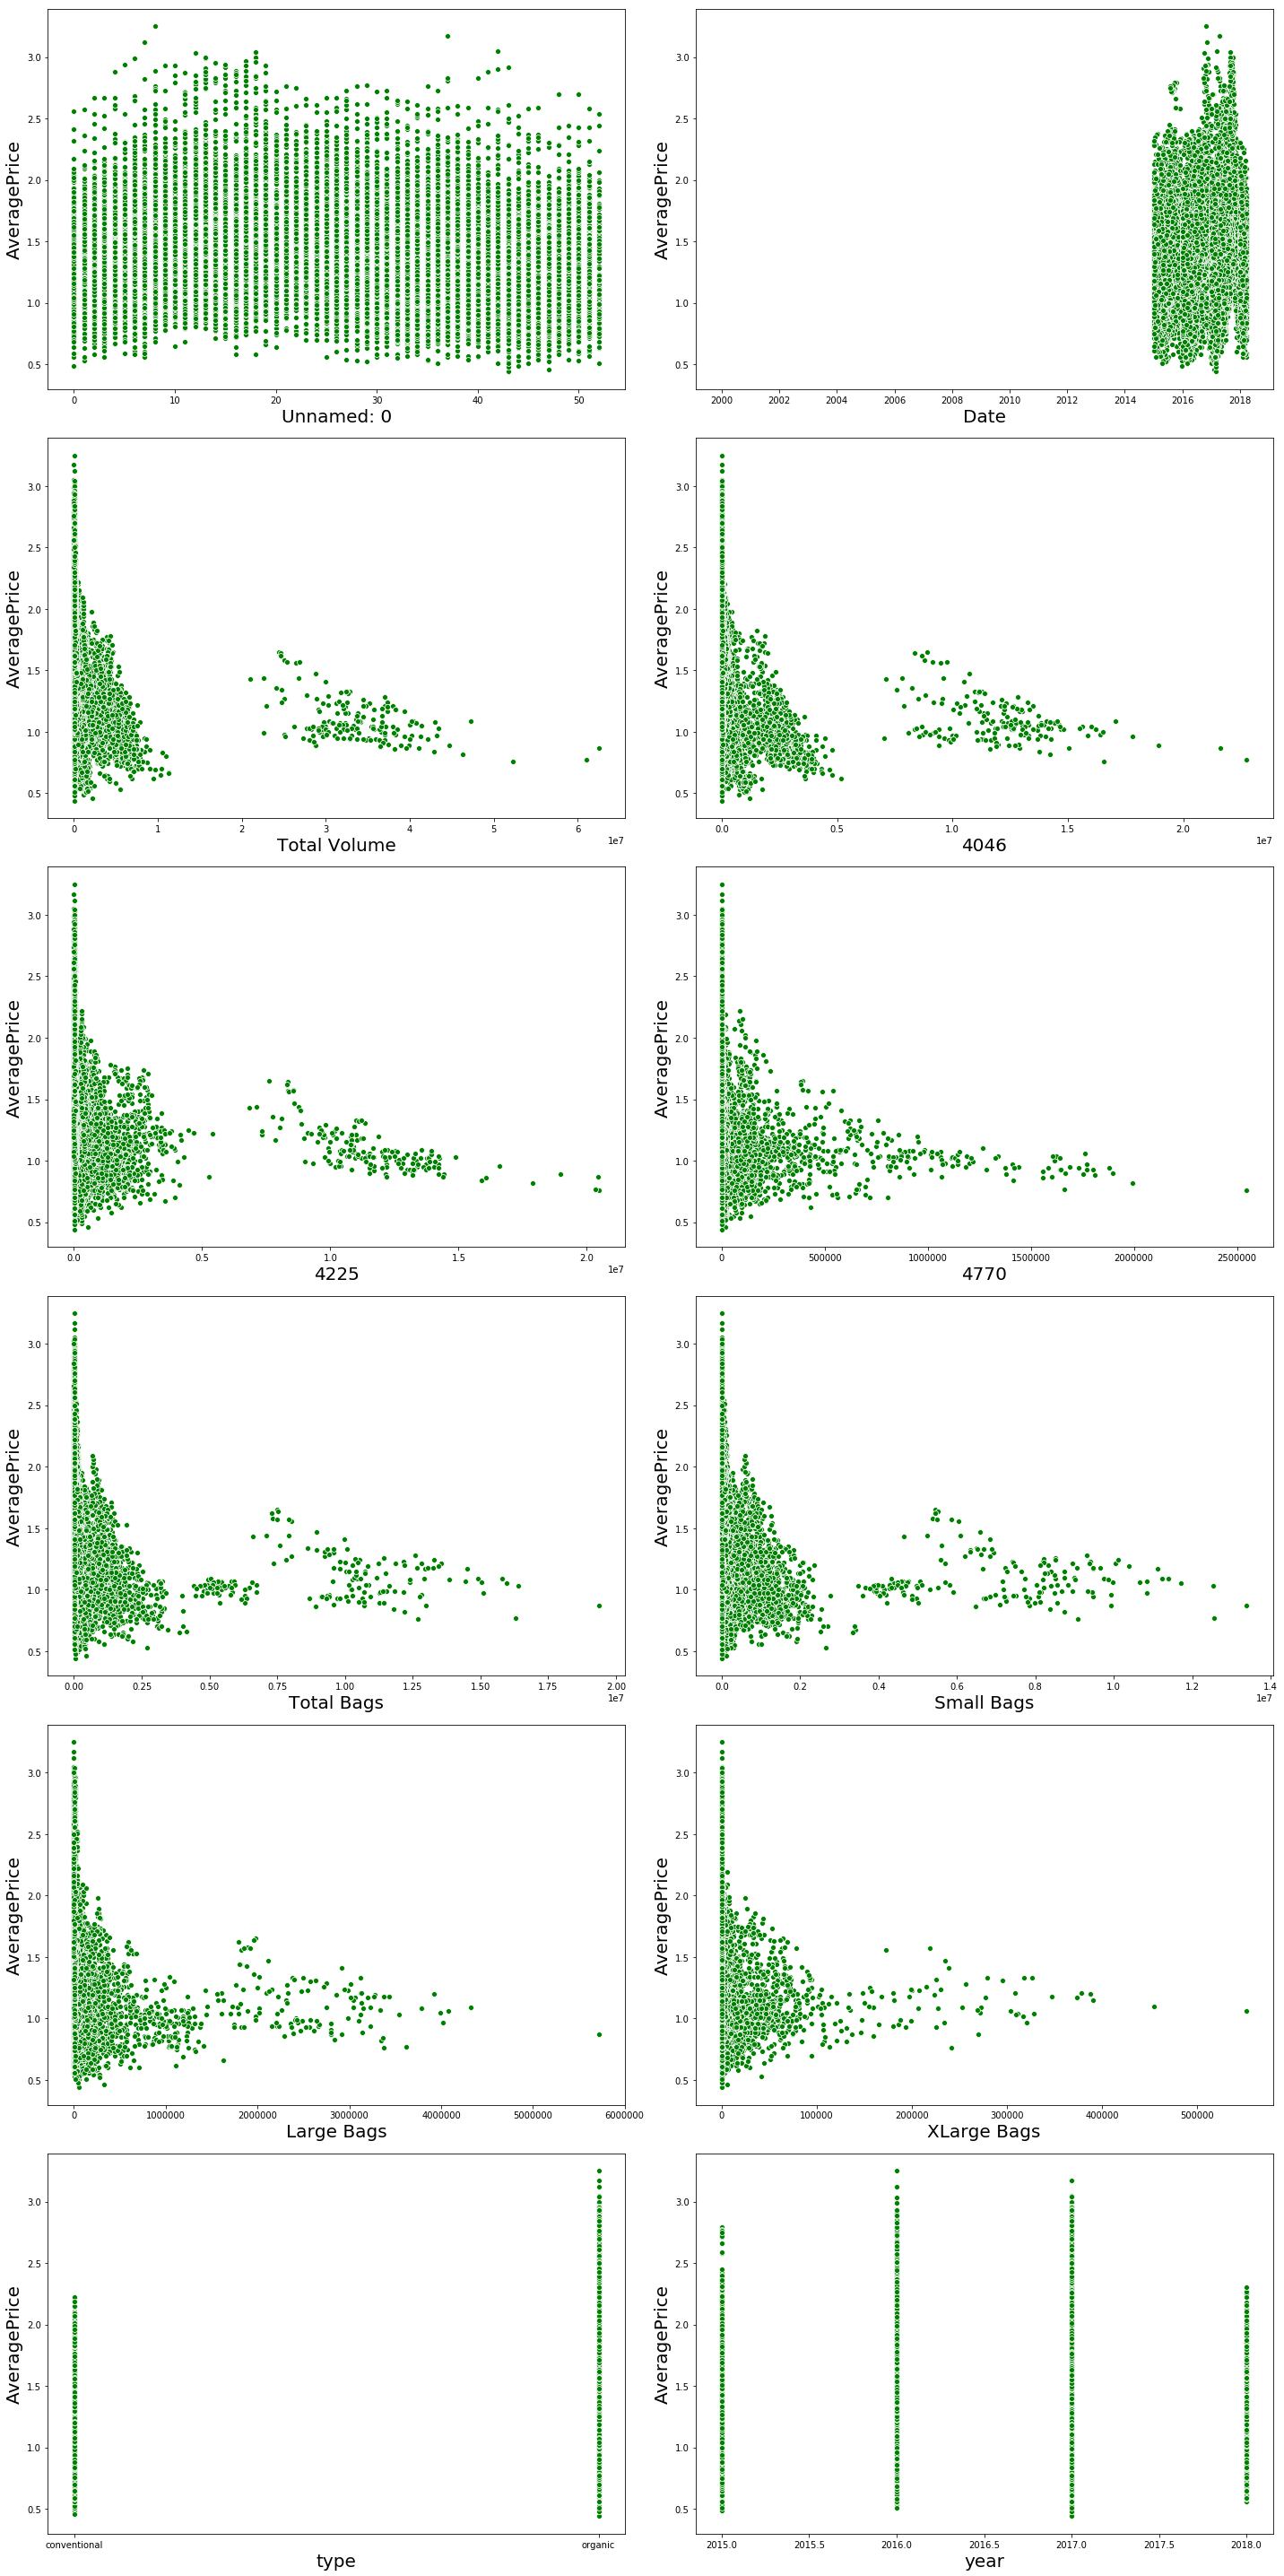

In [11]:

plt.figure(figsize=(20,40))
graph=1
for col in features:
    if graph<=12:
    
        plt.subplot(6,2,graph)
        sns.scatterplot(data[col],target['AveragePrice'],color='green')
        plt.xlabel(col,fontsize='20')
        plt.ylabel("AveragePrice",fontsize='20')
    graph+=1
plt.tight_layout()

Graph 1: shows relation of index and averagePrice.

Graph 2: here i am not analyse anything to the raltion of averagePrice with the Date.

Graph 3: the less value of  totalVolume more no. of averagePrice.
    
Graph 4: the selling of less no. values of 4046 has higher averagePrice.

Graph 5: the selling of less no. values of 4225 has higher averagePrice.

Graph 6: the selling of less no. values of 4770 has higher averagePrice.

Graph 7: the less no. of totalbags sold higher the averagePrice. 

Graph 8: the less no. of smallbags sold higher the averagePrice.

Graph 9: the less no. of largeBags sold higher the averagePrice.

Graph 10: the less no. of XLbags sold higher the averagePrice.

Graph 11: showing type wise sales of avocado that organiv has more no. of sales then conventional.

Graph 12: showing year wise sales of avocado.

#### Transforming date columns for further analysis.

In [12]:
data['day']=data['Date'].dt.day

here we get the day of that date.

In [13]:
data['week_day']=data['Date'].dt.weekday

here we get 6 only thats means all the data is of Sunday.

In [14]:
data['month']=data['Date'].dt.month

Here we get the month of that date.

In [15]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,week_day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,6,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,6,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,6,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,6,11


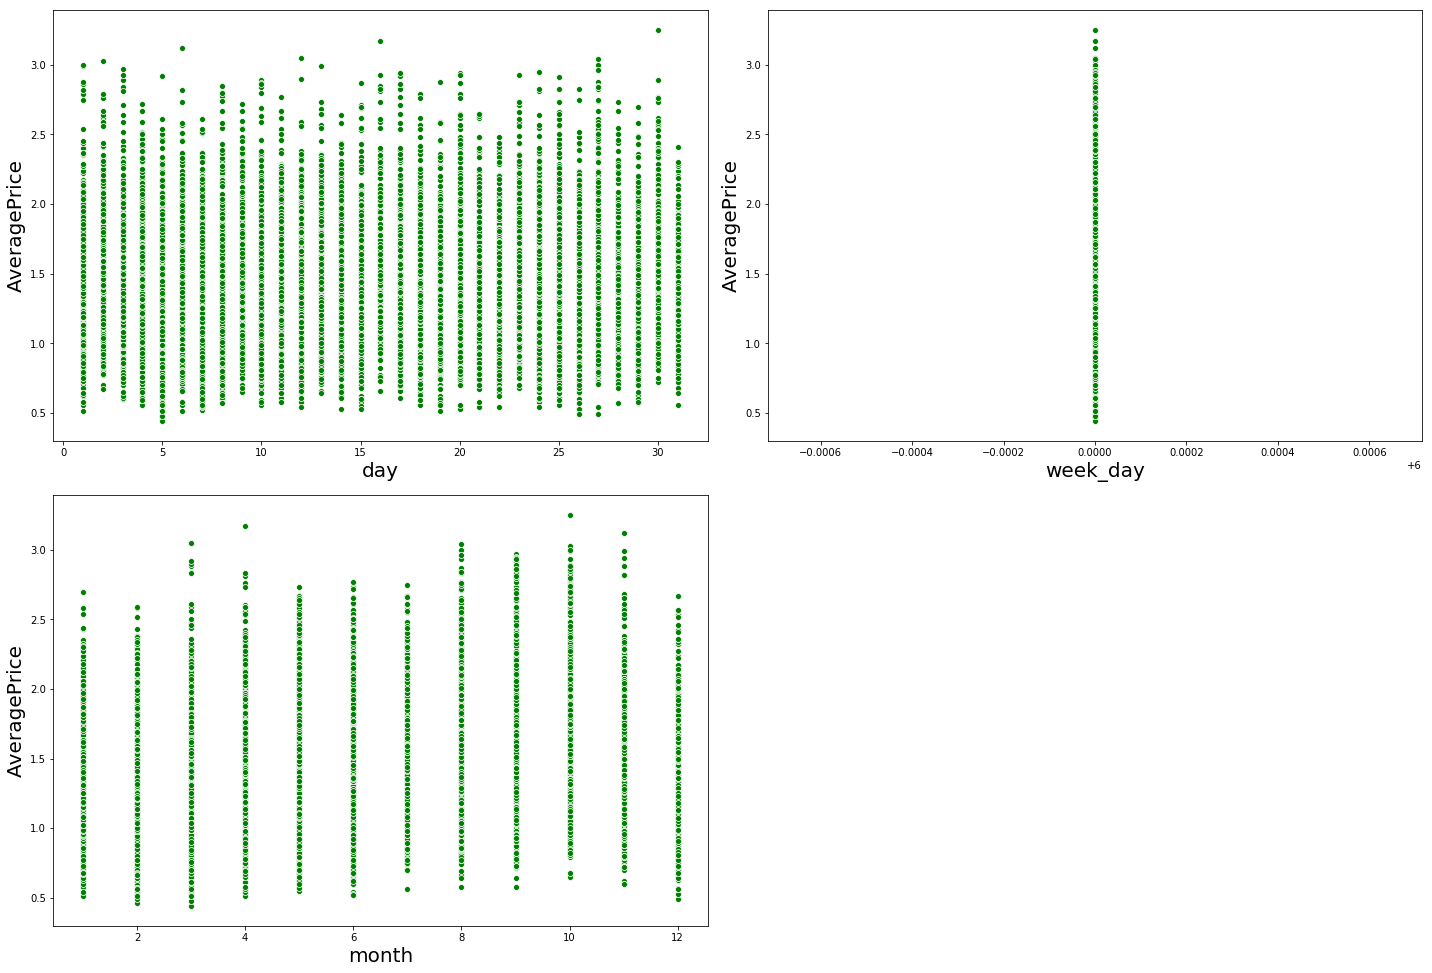

In [16]:

plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,-3:]:
    if graph<=12:
    
        plt.subplot(6,2,graph)
        sns.scatterplot(data[col],target['AveragePrice'],color='green')
        plt.xlabel(col,fontsize='20')
        plt.ylabel("AveragePrice",fontsize='20')
    graph+=1
plt.tight_layout()

fromm above graph i analyse that the sale of avocadi is uniform. its not dependent on day,weekday and month.

In [17]:
data['region'].value_counts()

Charlotte              338
Portland               338
Orlando                338
RaleighGreensboro      338
Boise                  338
Roanoke                338
SanDiego               338
LosAngeles             338
West                   338
Tampa                  338
Detroit                338
SanFrancisco           338
Atlanta                338
Denver                 338
NewOrleansMobile       338
Jacksonville           338
Houston                338
TotalUS                338
GreatLakes             338
PhoenixTucson          338
Pittsburgh             338
HartfordSpringfield    338
BuffaloRochester       338
SouthCarolina          338
Chicago                338
Albany                 338
Philadelphia           338
StLouis                338
NewYork                338
Sacramento             338
Indianapolis           338
MiamiFtLauderdale      338
DallasFtWorth          338
Northeast              338
Nashville              338
BaltimoreWashington    338
SouthCentral           338
L

all regions has same no. of records for the sales of avocado.

In [18]:
le=LabelEncoder()
target.region=le.fit_transform(data['region'])
features.type=data.type.replace({'conventional':0,'organic':1})

Transformed region and type column that was of object dtype not its int dtype.

In [19]:
features['day']=data['day']
features['month']=data.month
features['week_day']=data.week_day

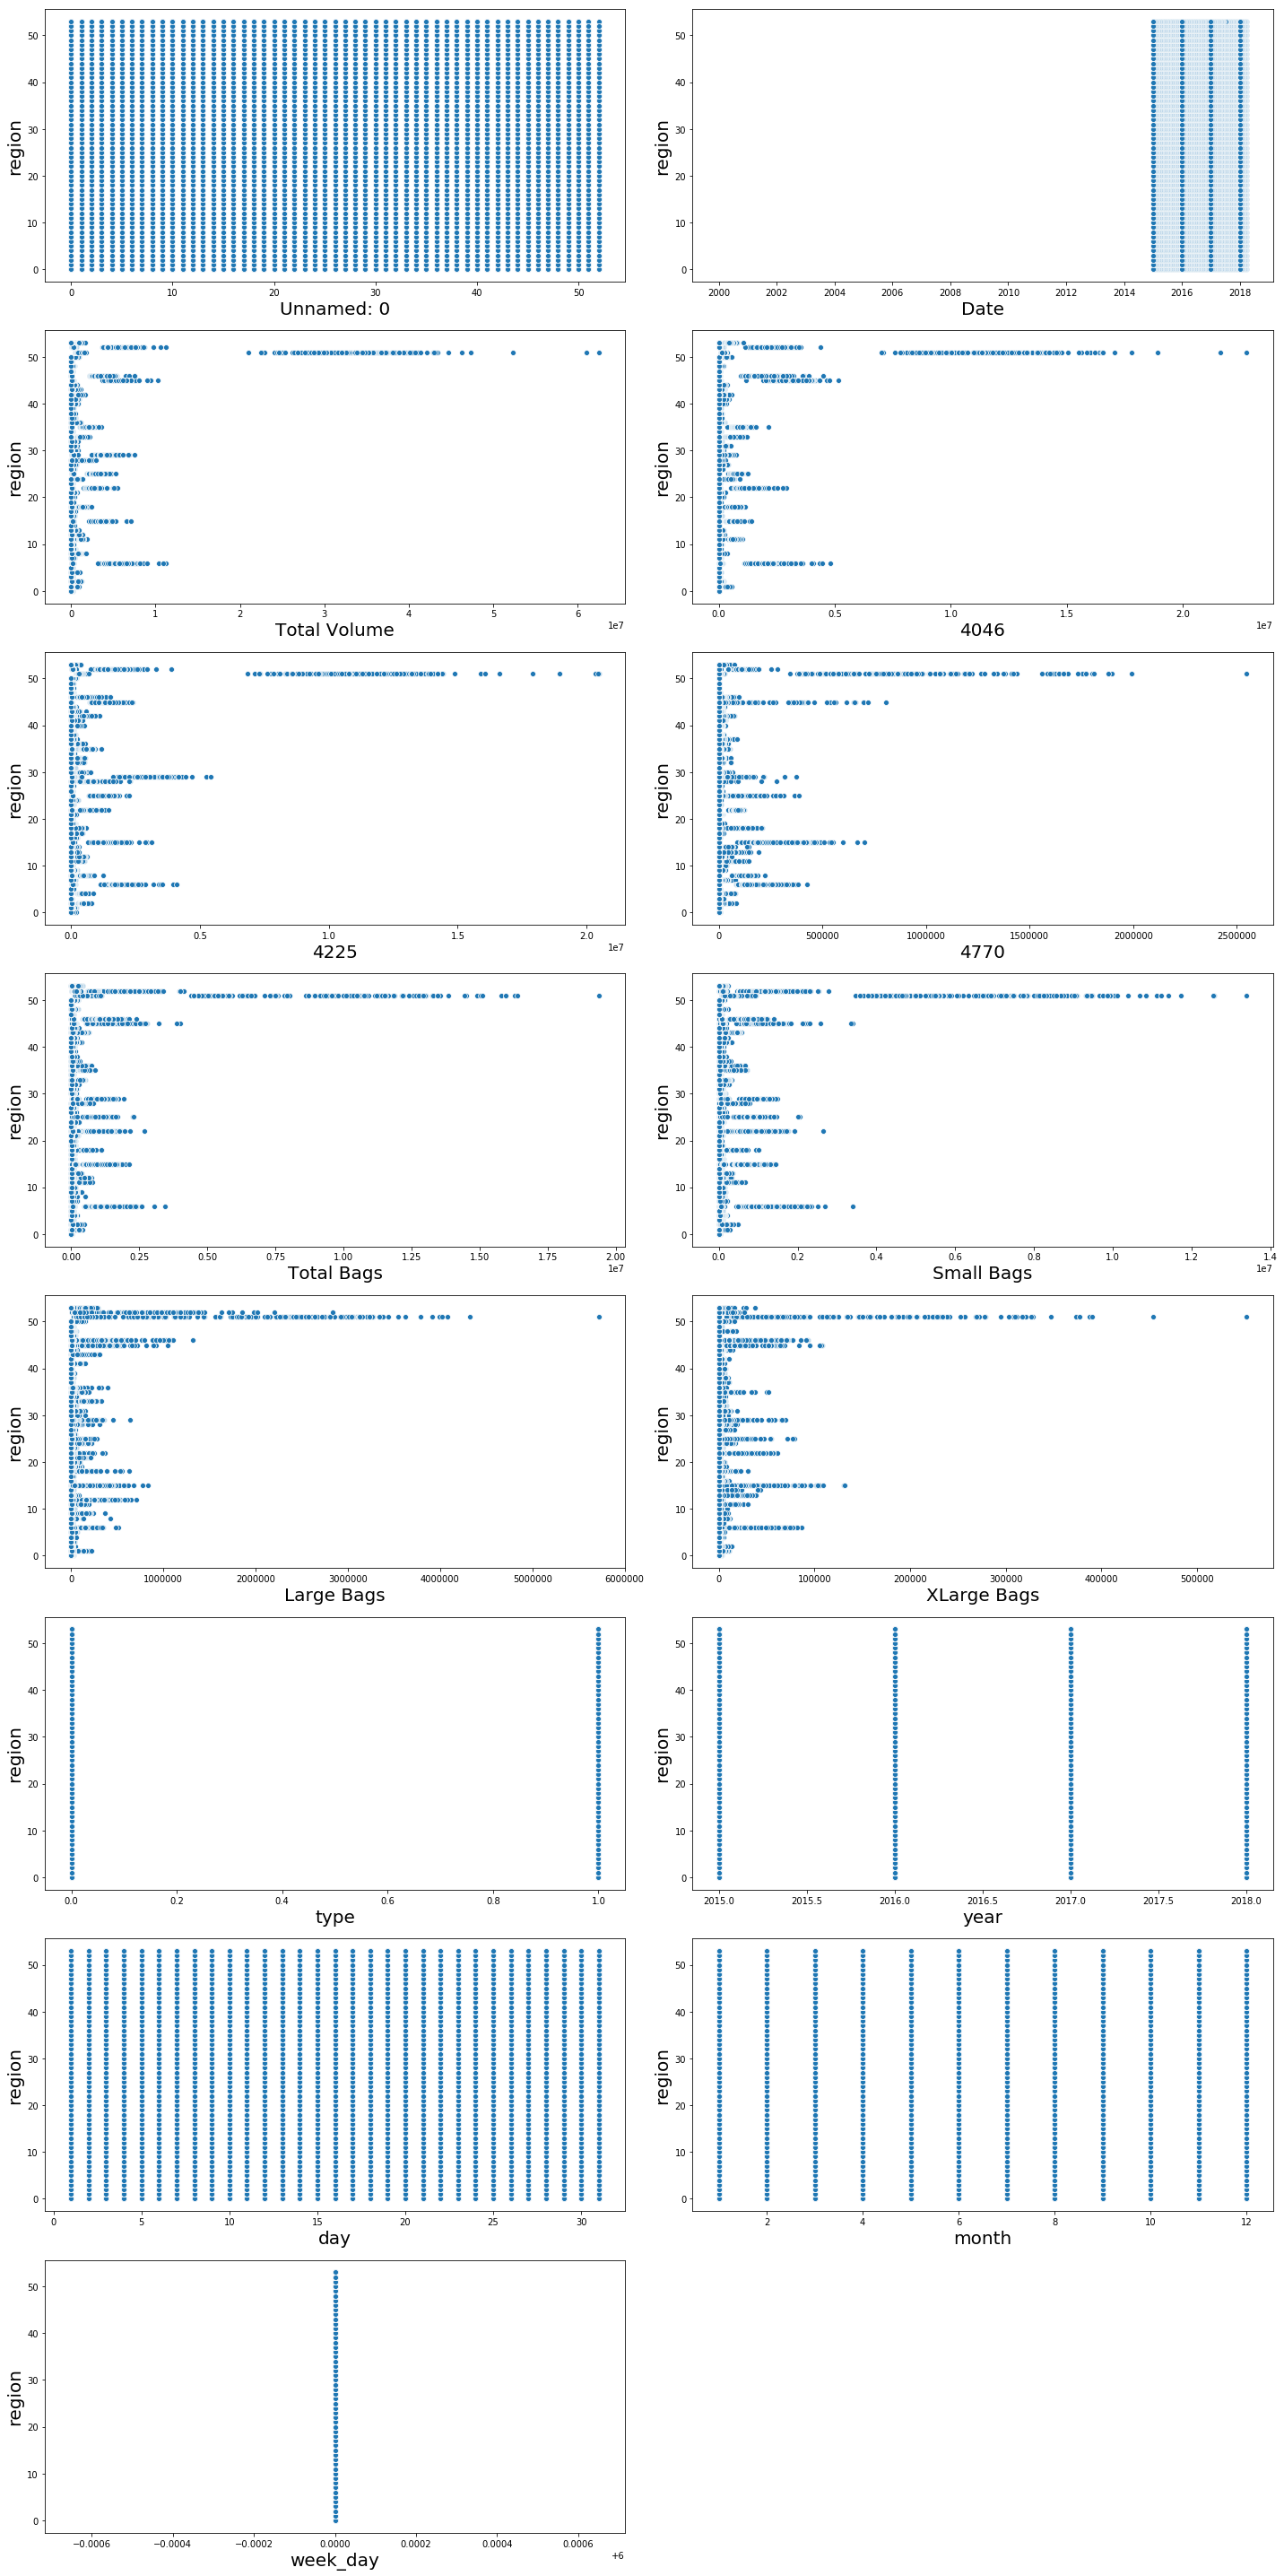

In [20]:
plt.figure(figsize=(20,40))
graph=1
for col in features:
    if graph<=15:
        plt.subplot(8,2,graph)
        sns.scatterplot(features[col],target['region'])
        plt.xlabel(col,fontsize='20')
        plt.ylabel("region",fontsize='20')
    graph+=1
plt.tight_layout()

from above graphs it seems to be like the region 52 is not normally distributed as this region has the highest no. of sales of TotalVolume,4046,4225,4770,totalBags,small bags,largeBags,XLBags.

the sales of type of avocado and in each year is normally distributed in all region 

in all day,month on Sunaday the sale is distributed normally.

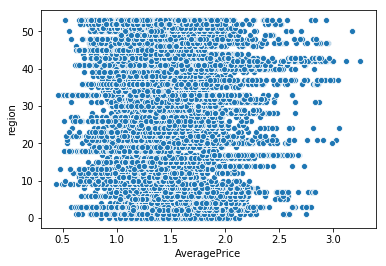

In [21]:
sns.scatterplot(x="AveragePrice",y="region",data=target)

here we can see that the range of averagePrice i.e. 0.5 to 2.5 is normally distributed in all region. 

### Checking Outliers

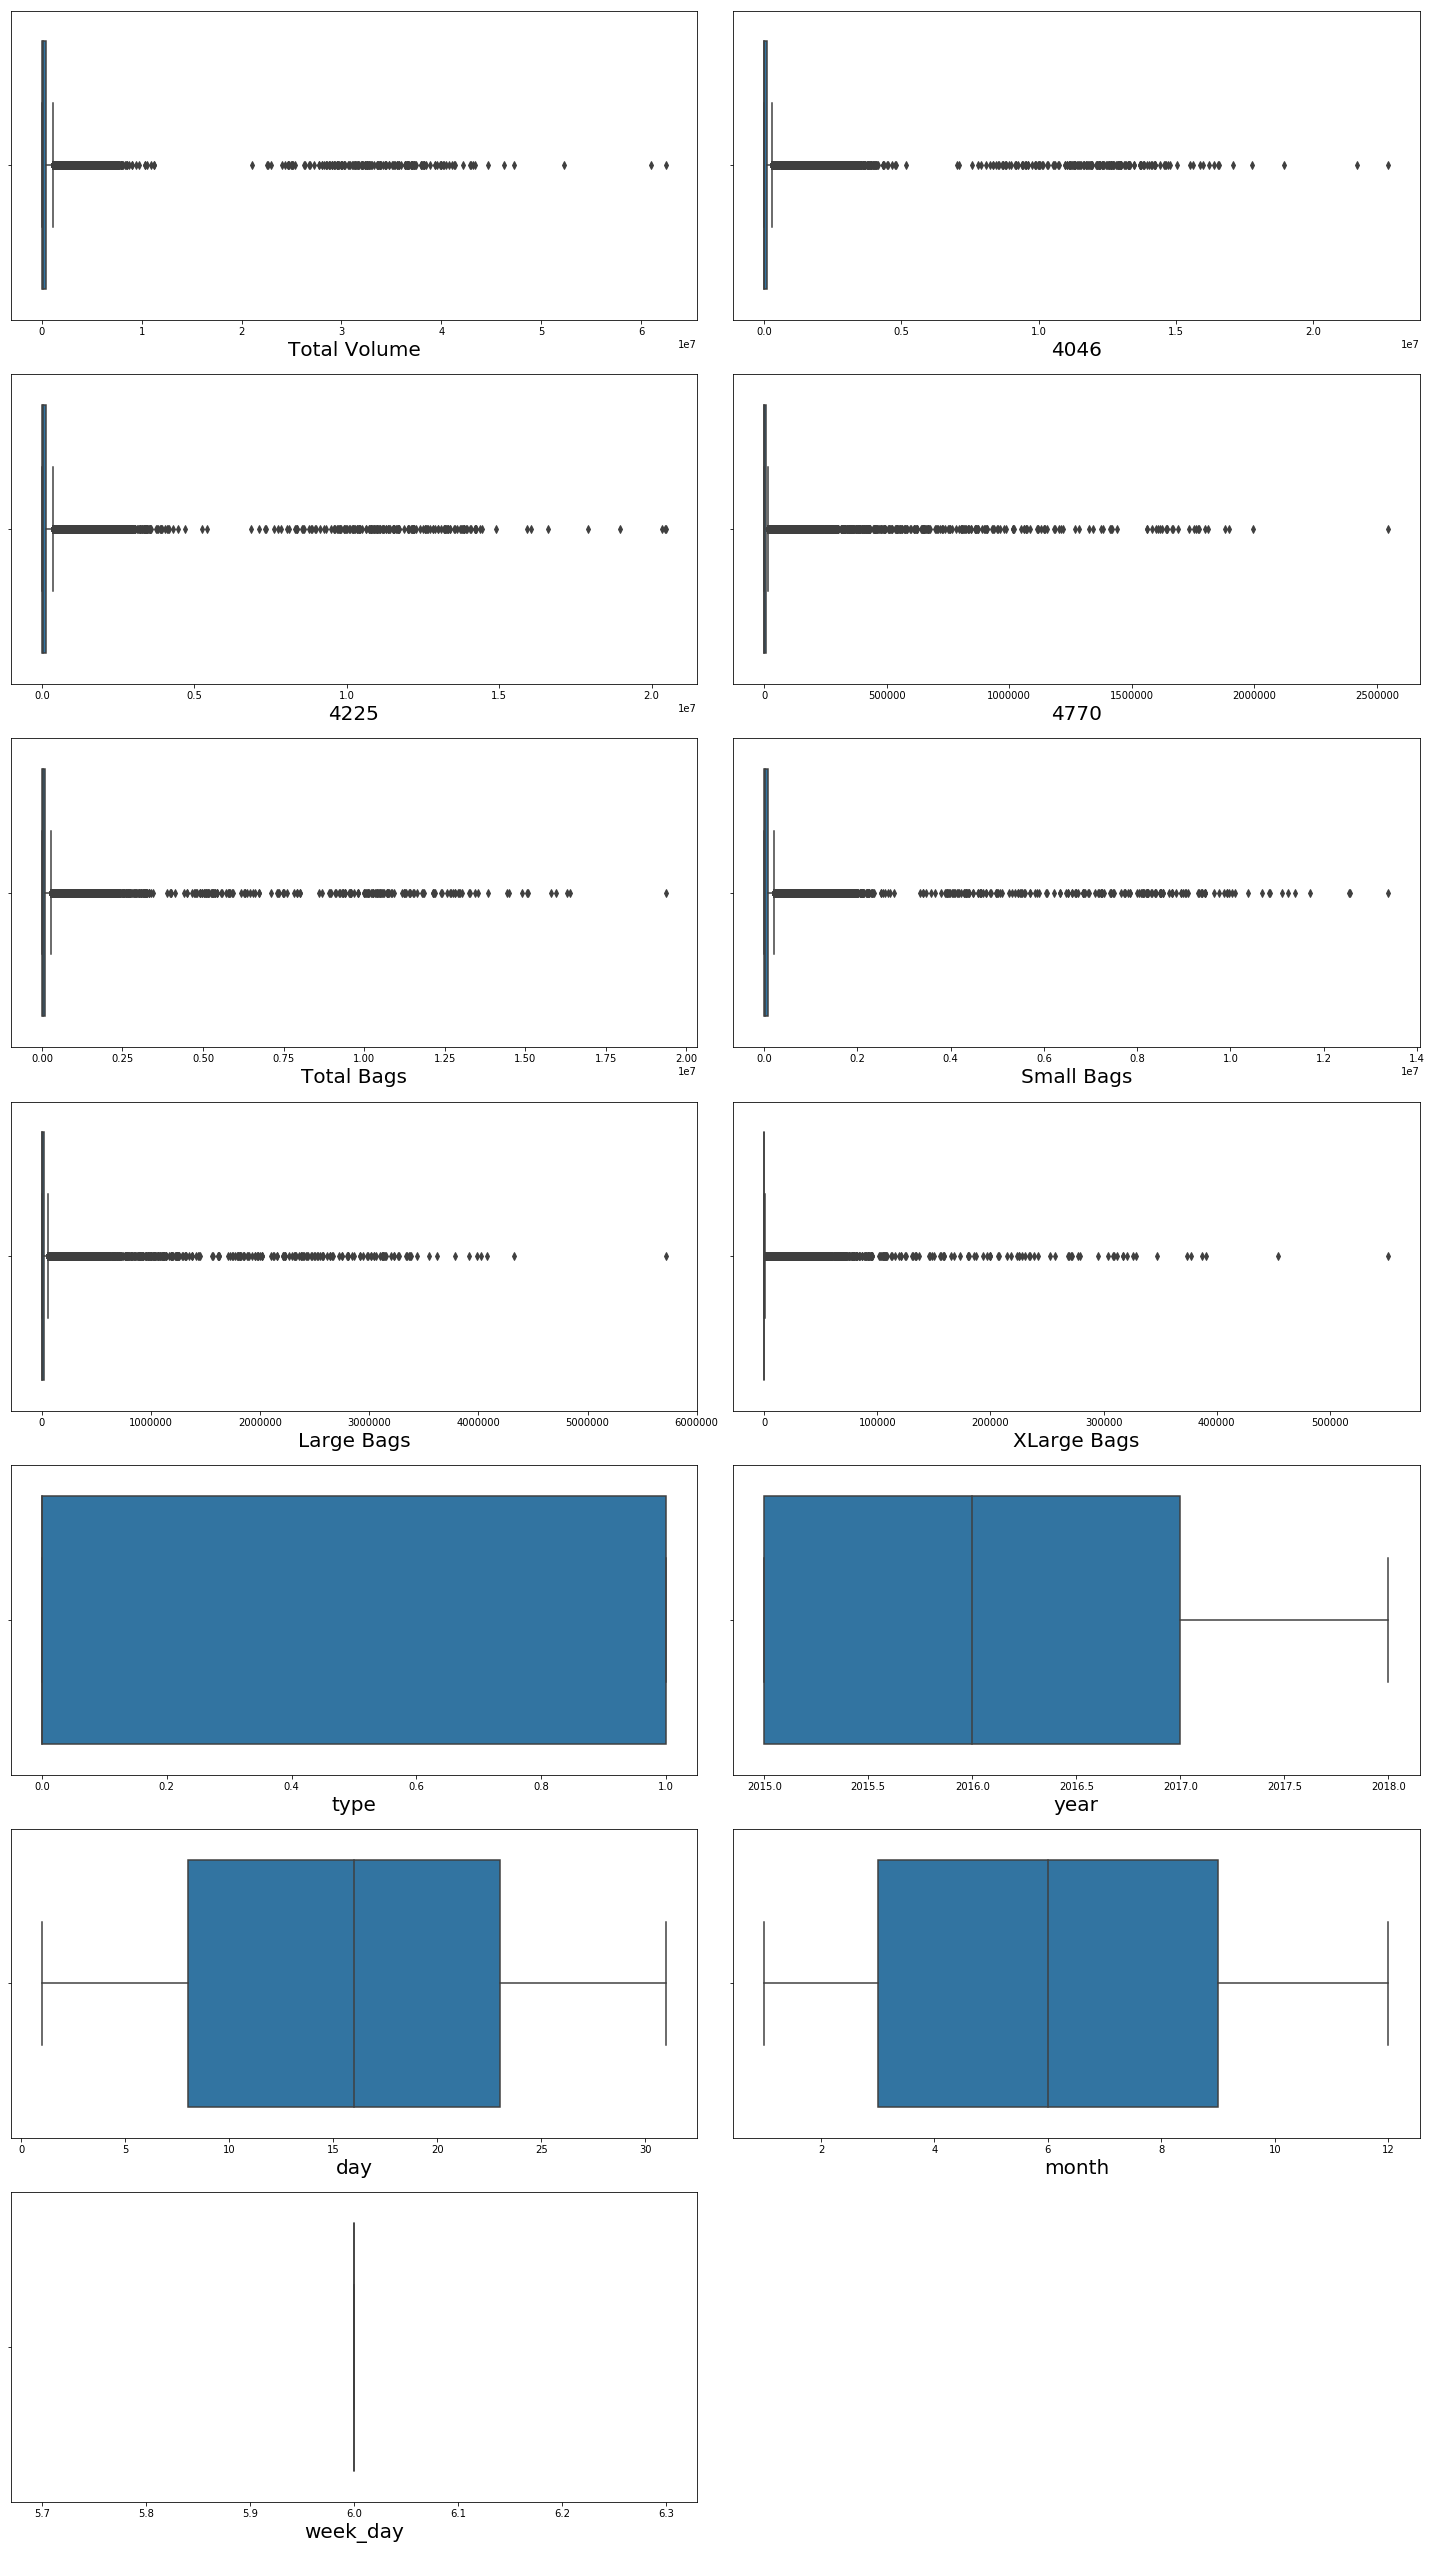

In [22]:
plt.figure(figsize=(20,40))
graph=1
for col in features.iloc[:,2:]:
    if graph<=15:
        plt.subplot(8,2,graph)
        sns.boxplot(features[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Its seems like there are outliers in TotalVolume,4046,4225,4770,totalBags,smallBags,largeBags,XLBags.

But this is beacause whenever the the average Price is low higher the quantity of each products with the no. of types of bags had been sold. But still it has some outliers in it.



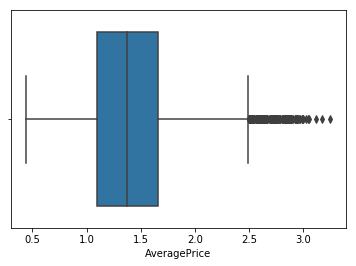

In [23]:
sns.boxplot(target.AveragePrice)

Outliers are in this.

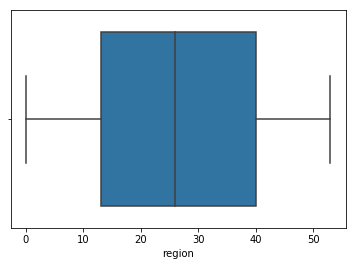

In [24]:
sns.boxplot(target.region)

No outliers in region.

In [25]:
b=data[data['Total Volume']<1000]
b.shape

(92, 17)

In [26]:
b.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,week_day,month
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany,27,6,12
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany,13,6,12
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany,29,6,11
9131,5,2015-11-22,1.94,858.83,13.84,84.18,0.0,760.81,755.69,5.12,0.0,organic,2015,Albany,22,6,11
9136,10,2015-10-18,1.97,969.29,10.31,158.07,0.0,800.91,800.91,0.00,0.0,organic,2015,Albany,18,6,10


Here when the quantity is less we can see the averagePrice is High and also less totalbags.

In [27]:
c=data[data['Total Volume']>1000]
c.shape

(18157, 17)

In [28]:
c.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,week_day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,6,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,6,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,6,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,6,11


Here when the quantity is more than 1000 we can see the averagePrice is low and also more no.of totalbags.

In [29]:
data['region']=target.region
data['type']=features.type

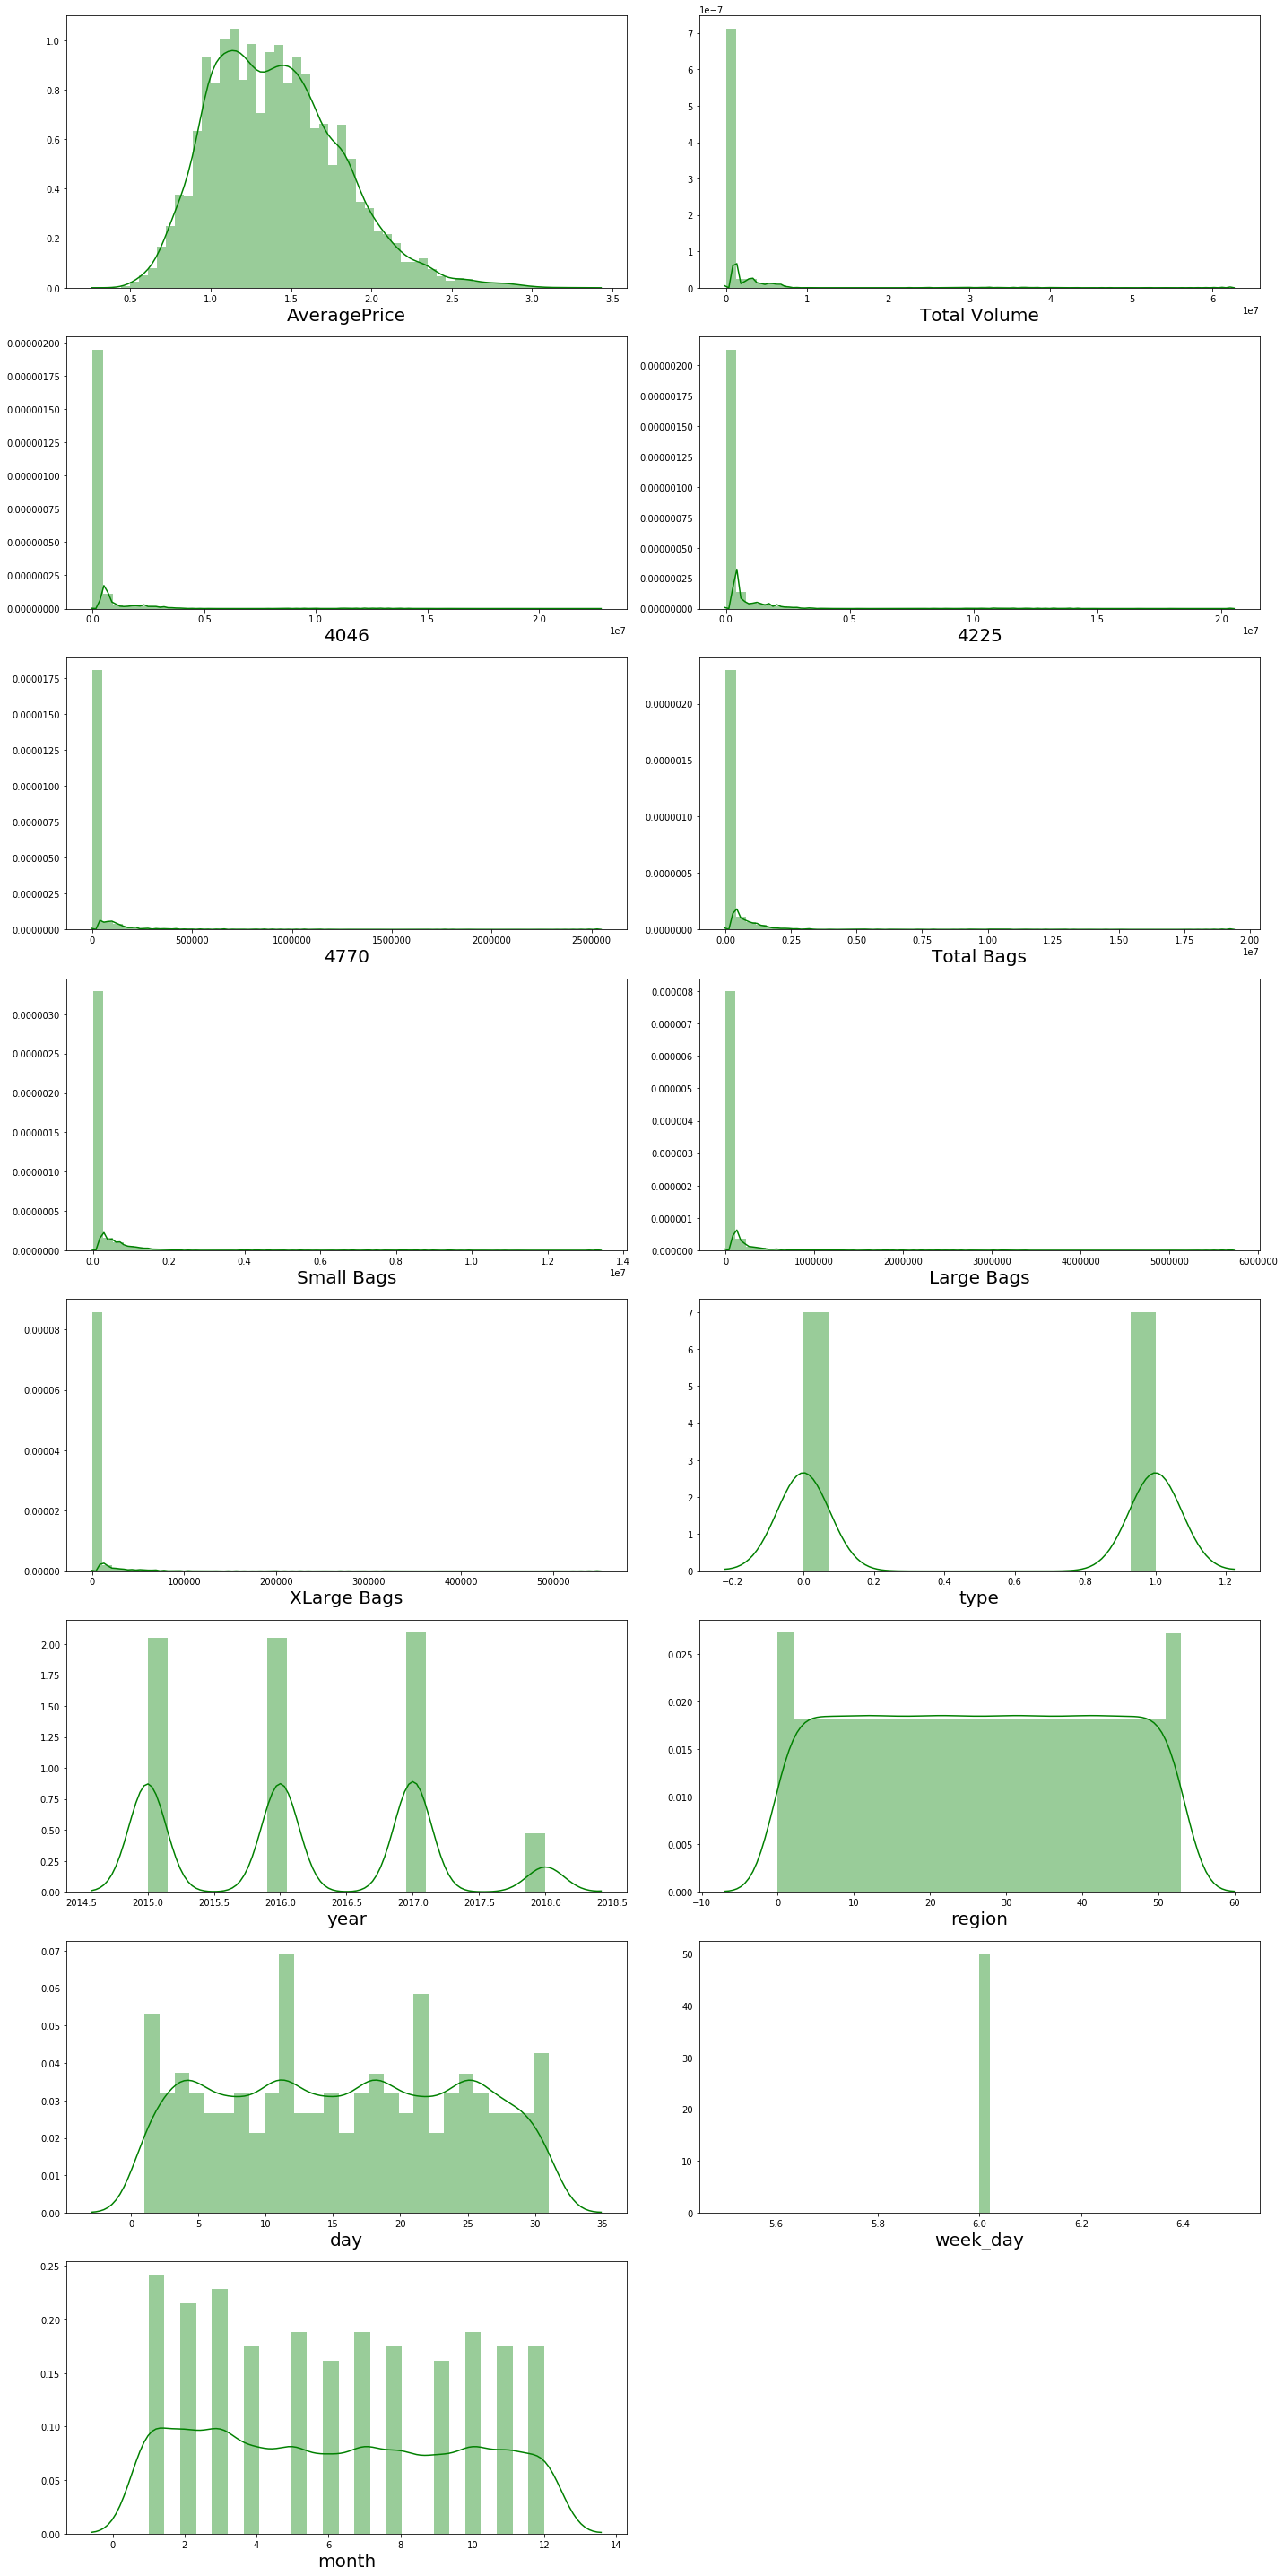

In [30]:
plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,2:]:
    if graph<17:
    
        plt.subplot(8,2,graph)
        sns.distplot(data[col],color='green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

4046 4225 4770 Total Bags  Small Bags    Large Bags  XLarge Bags    are not normally distributed                        

In [31]:
data.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
day              0.014310
week_day         0.000000
month            0.106617
dtype: float64

4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags has skewed.

#### Checking Multi-colineairty

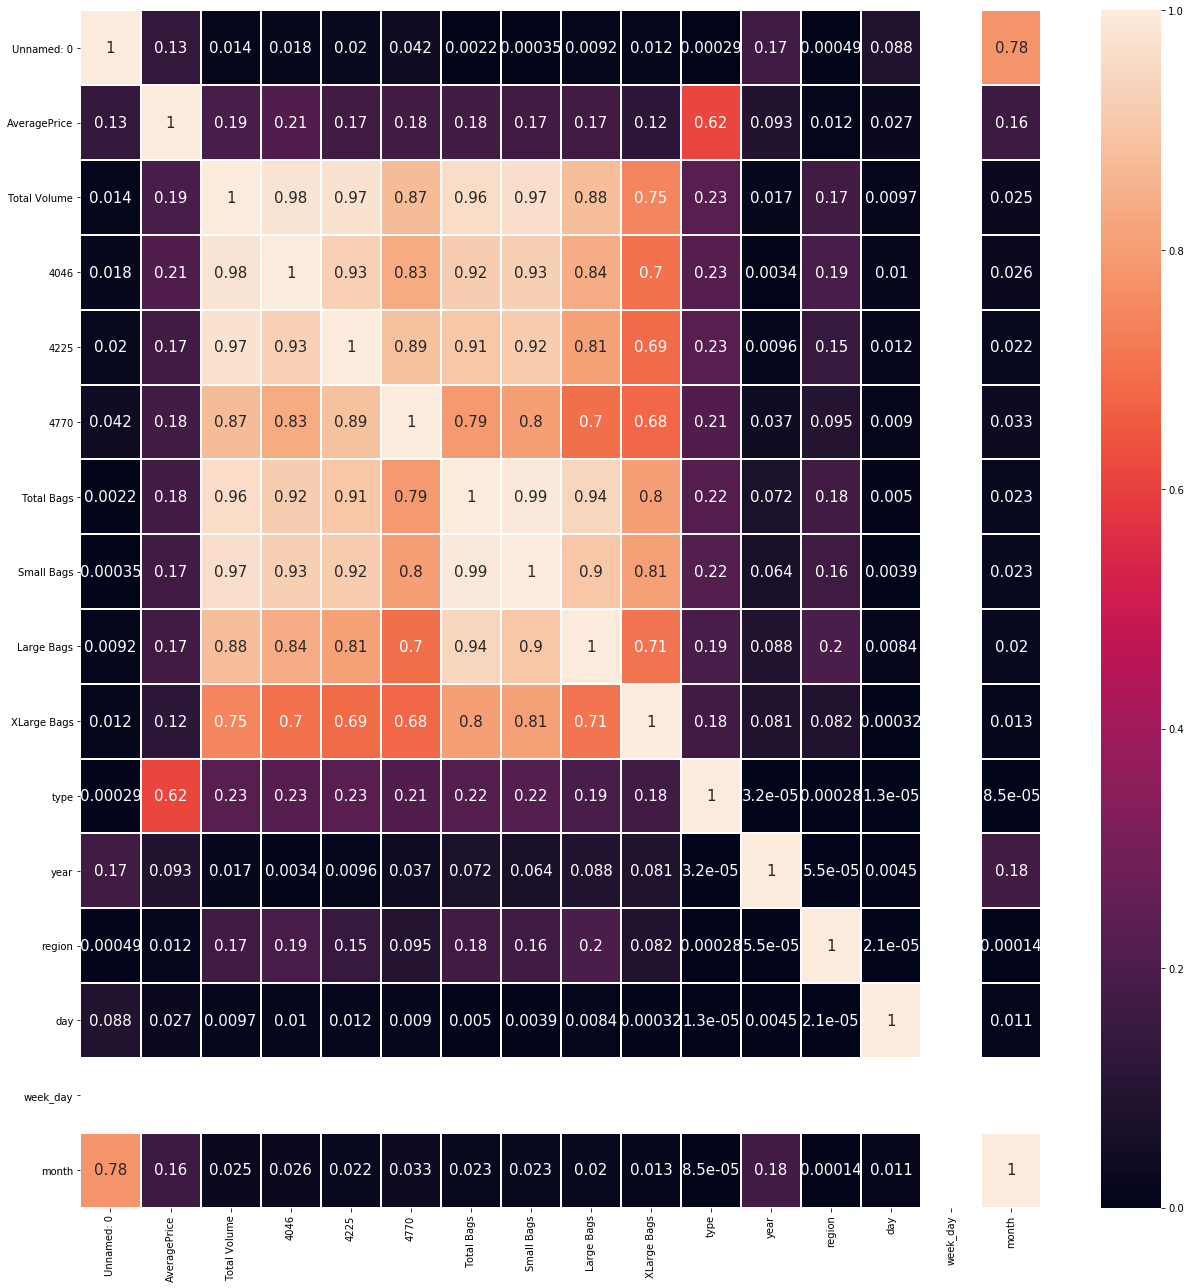

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

totalVolume:-4046,4225,4770,TotalBags,SmallBags consists multi-colinearity.
    
columns:-month,day,year,type,Unnamed: 0,averagePrice these columns has very very less impact on religion.

In [33]:
data=data.rename({"Total Volume":"Total_Vol","Total Bags":"Total_bags","Small Bags":"smallBags","Large Bags":"largeBags","XLarge Bags":"XLargeBags","4046":'foursix',"4225":'twoFive',"4770":'sevenZero'},axis=1)

In [34]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total_Vol,foursix,twoFive,sevenZero,Total_bags,smallBags,largeBags,XLargeBags,type,year,region,day,week_day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,6,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,6,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,6,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,6,11


In [35]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="region ~ Date+AveragePrice+Total_Vol+foursix+twoFive+sevenZero+Total_bags+smallBags+largeBags+XLargeBags+type+year+day+week_day+month",data=data).fit()

In [36]:
lm.rsquared_adj

0.056682812799411564

In [37]:
lm=smf.ols(formula="region ~ foursix+twoFive+sevenZero+smallBags+largeBags+XLargeBags+type+year",data=data).fit()

In [38]:
lm.rsquared_adj

0.064413143919404

removing columns to predict the region tobe best are AveragePrice,Total_Vol,Total_Bags,day,week_day,Date,Unnamed:0,month

In [39]:

lm=smf.ols(formula="AveragePrice ~ Date+region+Total_Vol+foursix+twoFive+sevenZero+Total_bags+smallBags+largeBags+XLargeBags+type+year+day+week_day+month",data=data).fit()

In [40]:
lm.rsquared_adj

0.5336277010795638

In [41]:
lm=smf.ols(formula="AveragePrice ~ Date+foursix+twoFive+sevenZero+smallBags+largeBags+XLargeBags+type",data=data).fit()

In [42]:
lm.rsquared_adj

0.5332633913221909

removing columns to predict the AveragePrice tobe best are region,Total_Vol,Total_Bags,day,week_day,month,Unnamed: 0+year

In [43]:
data.shape

(18249, 17)

#### Data Cleaning

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data.shape

(18249, 17)

there are no duplicats values in the dataset.

In [46]:
df_c=data.drop(columns=['AveragePrice','Total_Vol','Total_bags','day','week_day','Date','Unnamed: 0','month'],axis=1)
df_c.head()

,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0


the columns that we dropped on the basis of analysis of adjusted_r-quared values for region

In [47]:
df_reg=data.drop(columns=['region','Total_Vol','Total_bags','day','week_day','Unnamed: 0','month'],axis=1)
df_reg.head()

,Date,AveragePrice,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags,type,year
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015


In [48]:
df_reg=df_reg[['Date','foursix','twoFive','sevenZero','smallBags','largeBags','XLargeBags','type','year','AveragePrice']]
df_reg.head()

,Date,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags,type,year,AveragePrice
0,2015-12-27,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,1.33
1,2015-12-20,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,1.35
2,2015-12-13,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0.93
3,2015-12-06,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,1.08
4,2015-11-29,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,1.28


the columns that we dropped on the basis of analysis of adjusted_r-quared values for AveragePrice.

In [49]:
df_reg['Date']=df_reg.Date.astype(str)

In [50]:
df_reg['Date']=le.fit_transform(df_reg['Date'])

#### Removing Outliers

In [51]:
#Removing for prediction of region dataset.
zs=zscore(df_c[["foursix","twoFive","sevenZero","smallBags","largeBags","XLargeBags"]])
filtered=(np.abs(zs)<3).all(axis=1)
df_c=df_c[filtered]

In [52]:
#Removing for prediction of AveragrPrice dataset.
zs=zscore(df_reg[["foursix","twoFive","sevenZero","smallBags","largeBags","XLargeBags"]])
filtered=(np.abs(zs)<3).all(axis=1)
df_reg=df_reg[filtered]

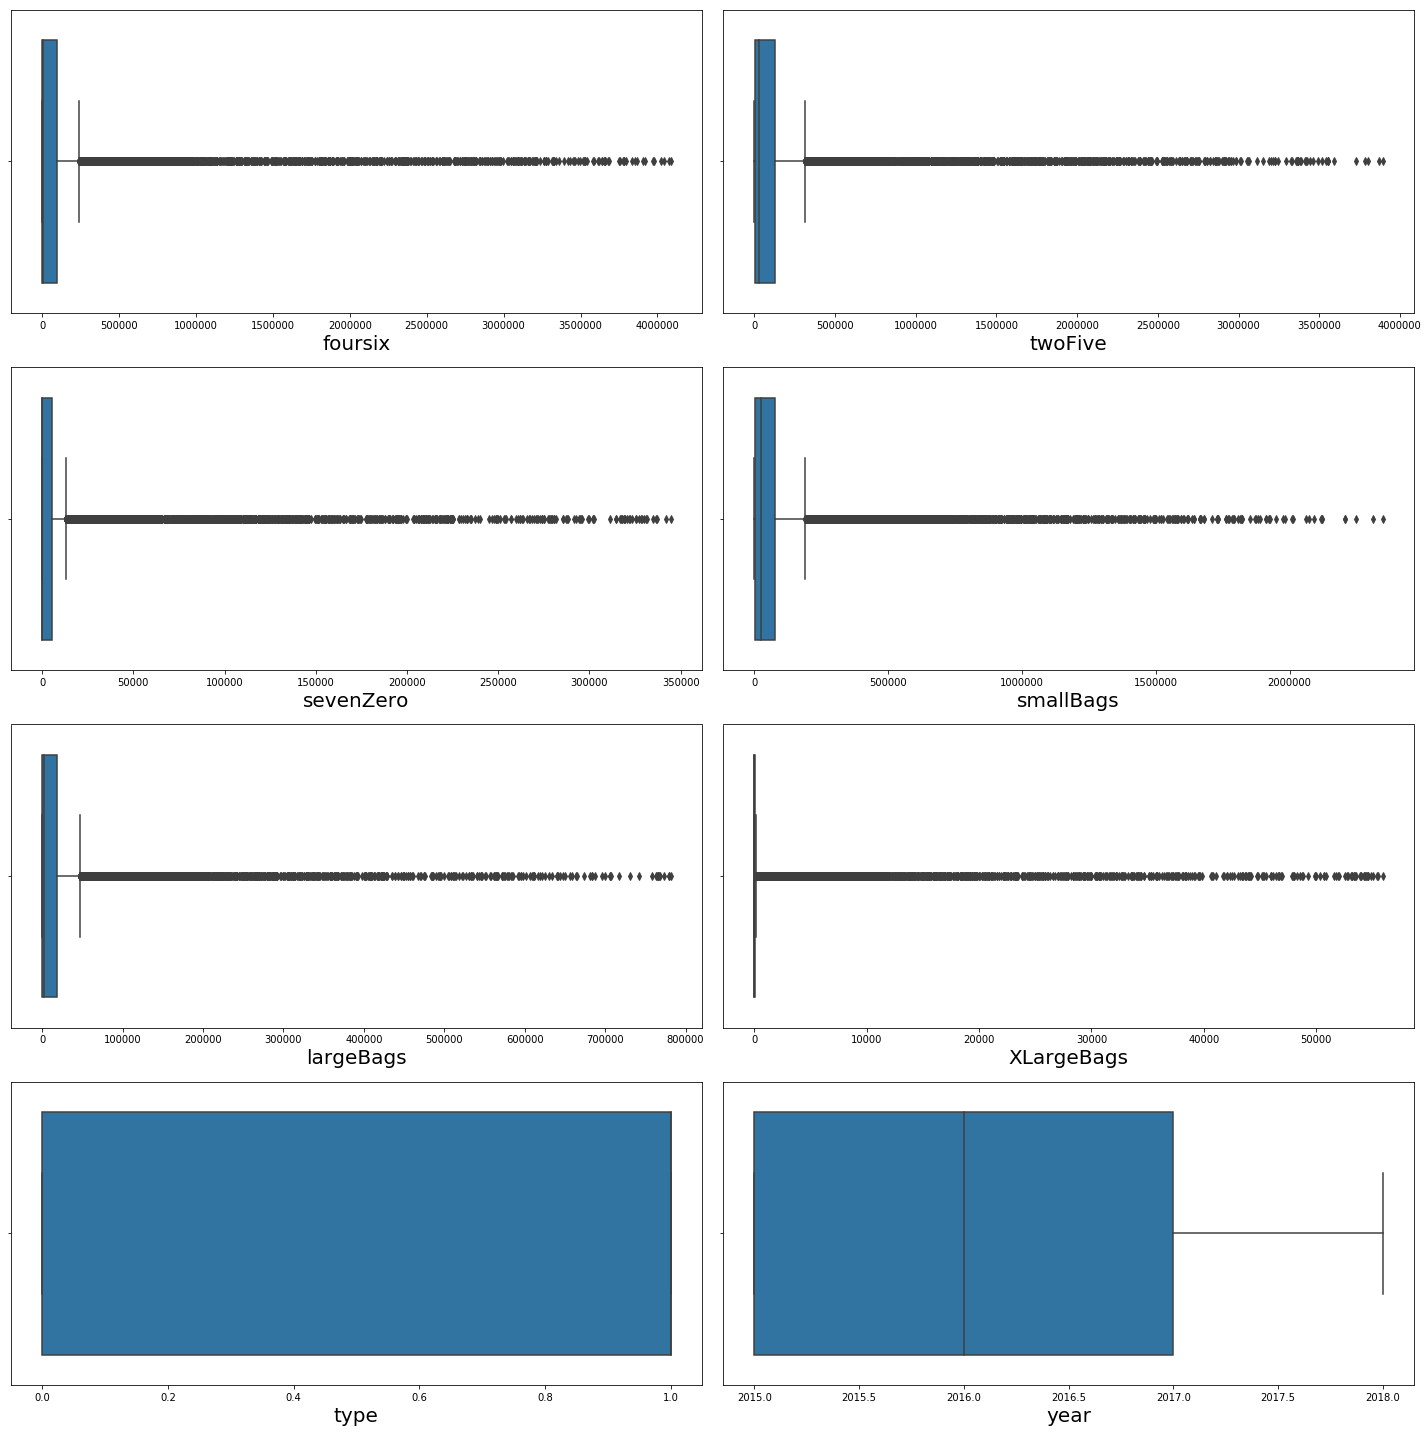

In [53]:
plt.figure(figsize=(20,20))
graph=1
for col in df_c.iloc[:,:-1]:
    if graph<=8:
        plt.subplot(4,2,graph)
        sns.boxplot(df_c[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Remove some Outliers.

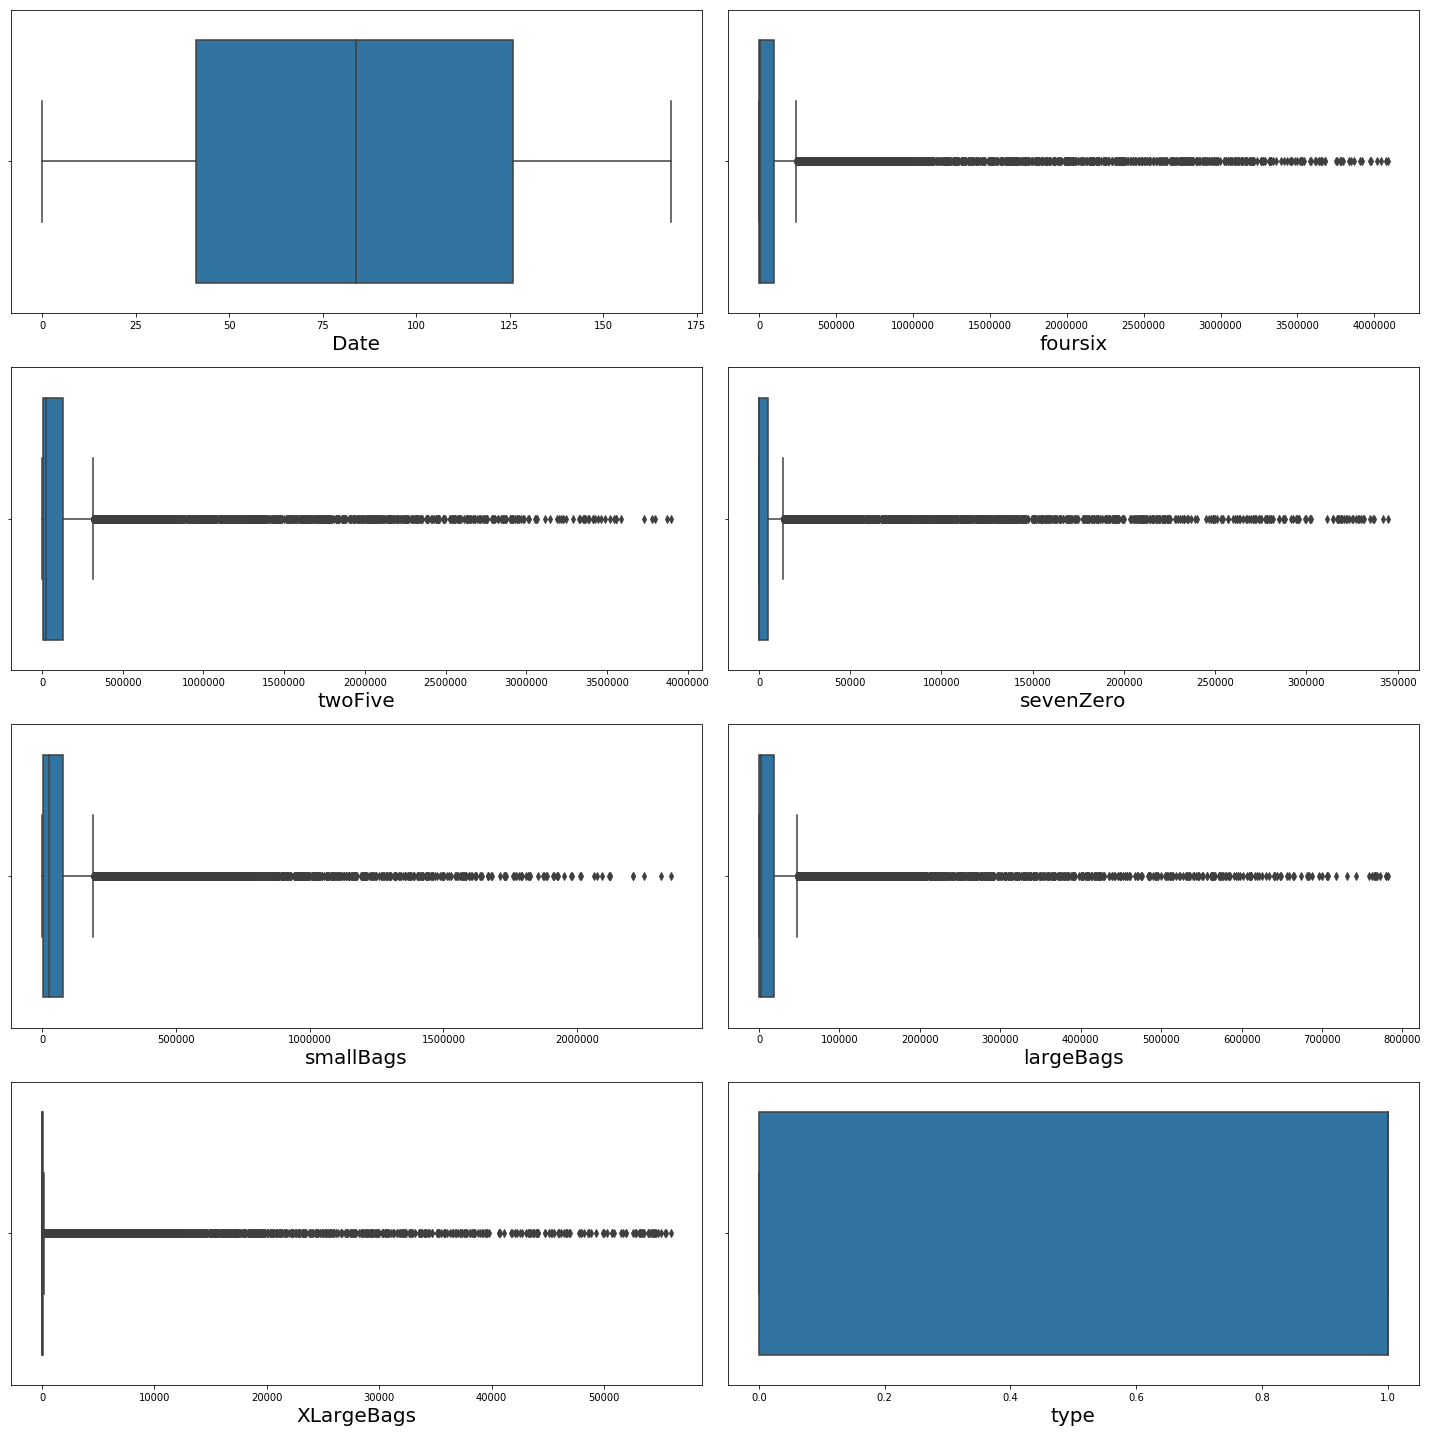

In [54]:
plt.figure(figsize=(20,20))
graph=1
for col in df_reg.iloc[:,:-1]:
    if graph<=8:
        plt.subplot(4,2,graph)
        sns.boxplot(df_reg[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Remove some Outliers.

#### Normalizing Techniques

In [55]:
df_c.describe()

,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags,type,year,region
count,1.778200e+04,1.778200e+04,17782.000000,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,1.535177e+05,1.644240e+05,11078.541716,9.990217e+04,27640.732102,1347.377066,0.513047,2016.141098,26.161624
std,4.381507e+05,3.978660e+05,34373.958145,2.288217e+05,72791.402335,5222.289928,0.499844,0.939273,15.402194
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,8.043150e+02,2.877773e+03,0.000000,2.636443e+03,109.015000,0.000000,0.000000,2015.000000,13.000000
50%,7.514895e+03,2.603862e+04,158.285000,2.395354e+04,2402.420000,0.000000,1.000000,2016.000000,26.000000
75%,9.713905e+04,1.271795e+05,5175.322500,7.780317e+04,18809.847500,70.292500,1.000000,2017.000000,39.000000
max,4.085859e+06,3.894802e+06,344488.510000,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,53.000000


as we can see that the mean is less then standard deviation so its mean that the data is abnormal distributed.

In [56]:
df_reg.describe()

,Date,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags,type,year,AveragePrice
count,17782.000000,1.778200e+04,1.778200e+04,17782.000000,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,83.719492,1.535177e+05,1.644240e+05,11078.541716,9.990217e+04,27640.732102,1347.377066,0.513047,2016.141098,1.415546
std,48.816121,4.381507e+05,3.978660e+05,34373.958145,2.288217e+05,72791.402335,5222.289928,0.499844,0.939273,0.402278
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.440000
25%,41.000000,8.043150e+02,2.877773e+03,0.000000,2.636443e+03,109.015000,0.000000,0.000000,2015.000000,1.110000
50%,84.000000,7.514895e+03,2.603862e+04,158.285000,2.395354e+04,2402.420000,0.000000,1.000000,2016.000000,1.380000
75%,126.000000,9.713905e+04,1.271795e+05,5175.322500,7.780317e+04,18809.847500,70.292500,1.000000,2017.000000,1.670000
max,168.000000,4.085859e+06,3.894802e+06,344488.510000,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,3.250000


same with the df_reg.

In [57]:
features=['foursix','twoFive','sevenZero','smallBags','largeBags','XLargeBags']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df_c[features]=scalar.fit_transform(df_c[features].values)
df_c[features].head()

,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702


In [58]:
features=['foursix','twoFive','sevenZero','smallBags','largeBags','XLargeBags']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df_reg[features]=scalar.fit_transform(df_reg[features].values)
df_reg[features].head()

,foursix,twoFive,sevenZero,smallBags,largeBags,XLargeBags
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702


In [59]:
df_reg.dtypes

Date              int32
foursix         float64
twoFive         float64
sevenZero       float64
smallBags       float64
largeBags       float64
XLargeBags      float64
type              int64
year              int64
AveragePrice    float64
dtype: object

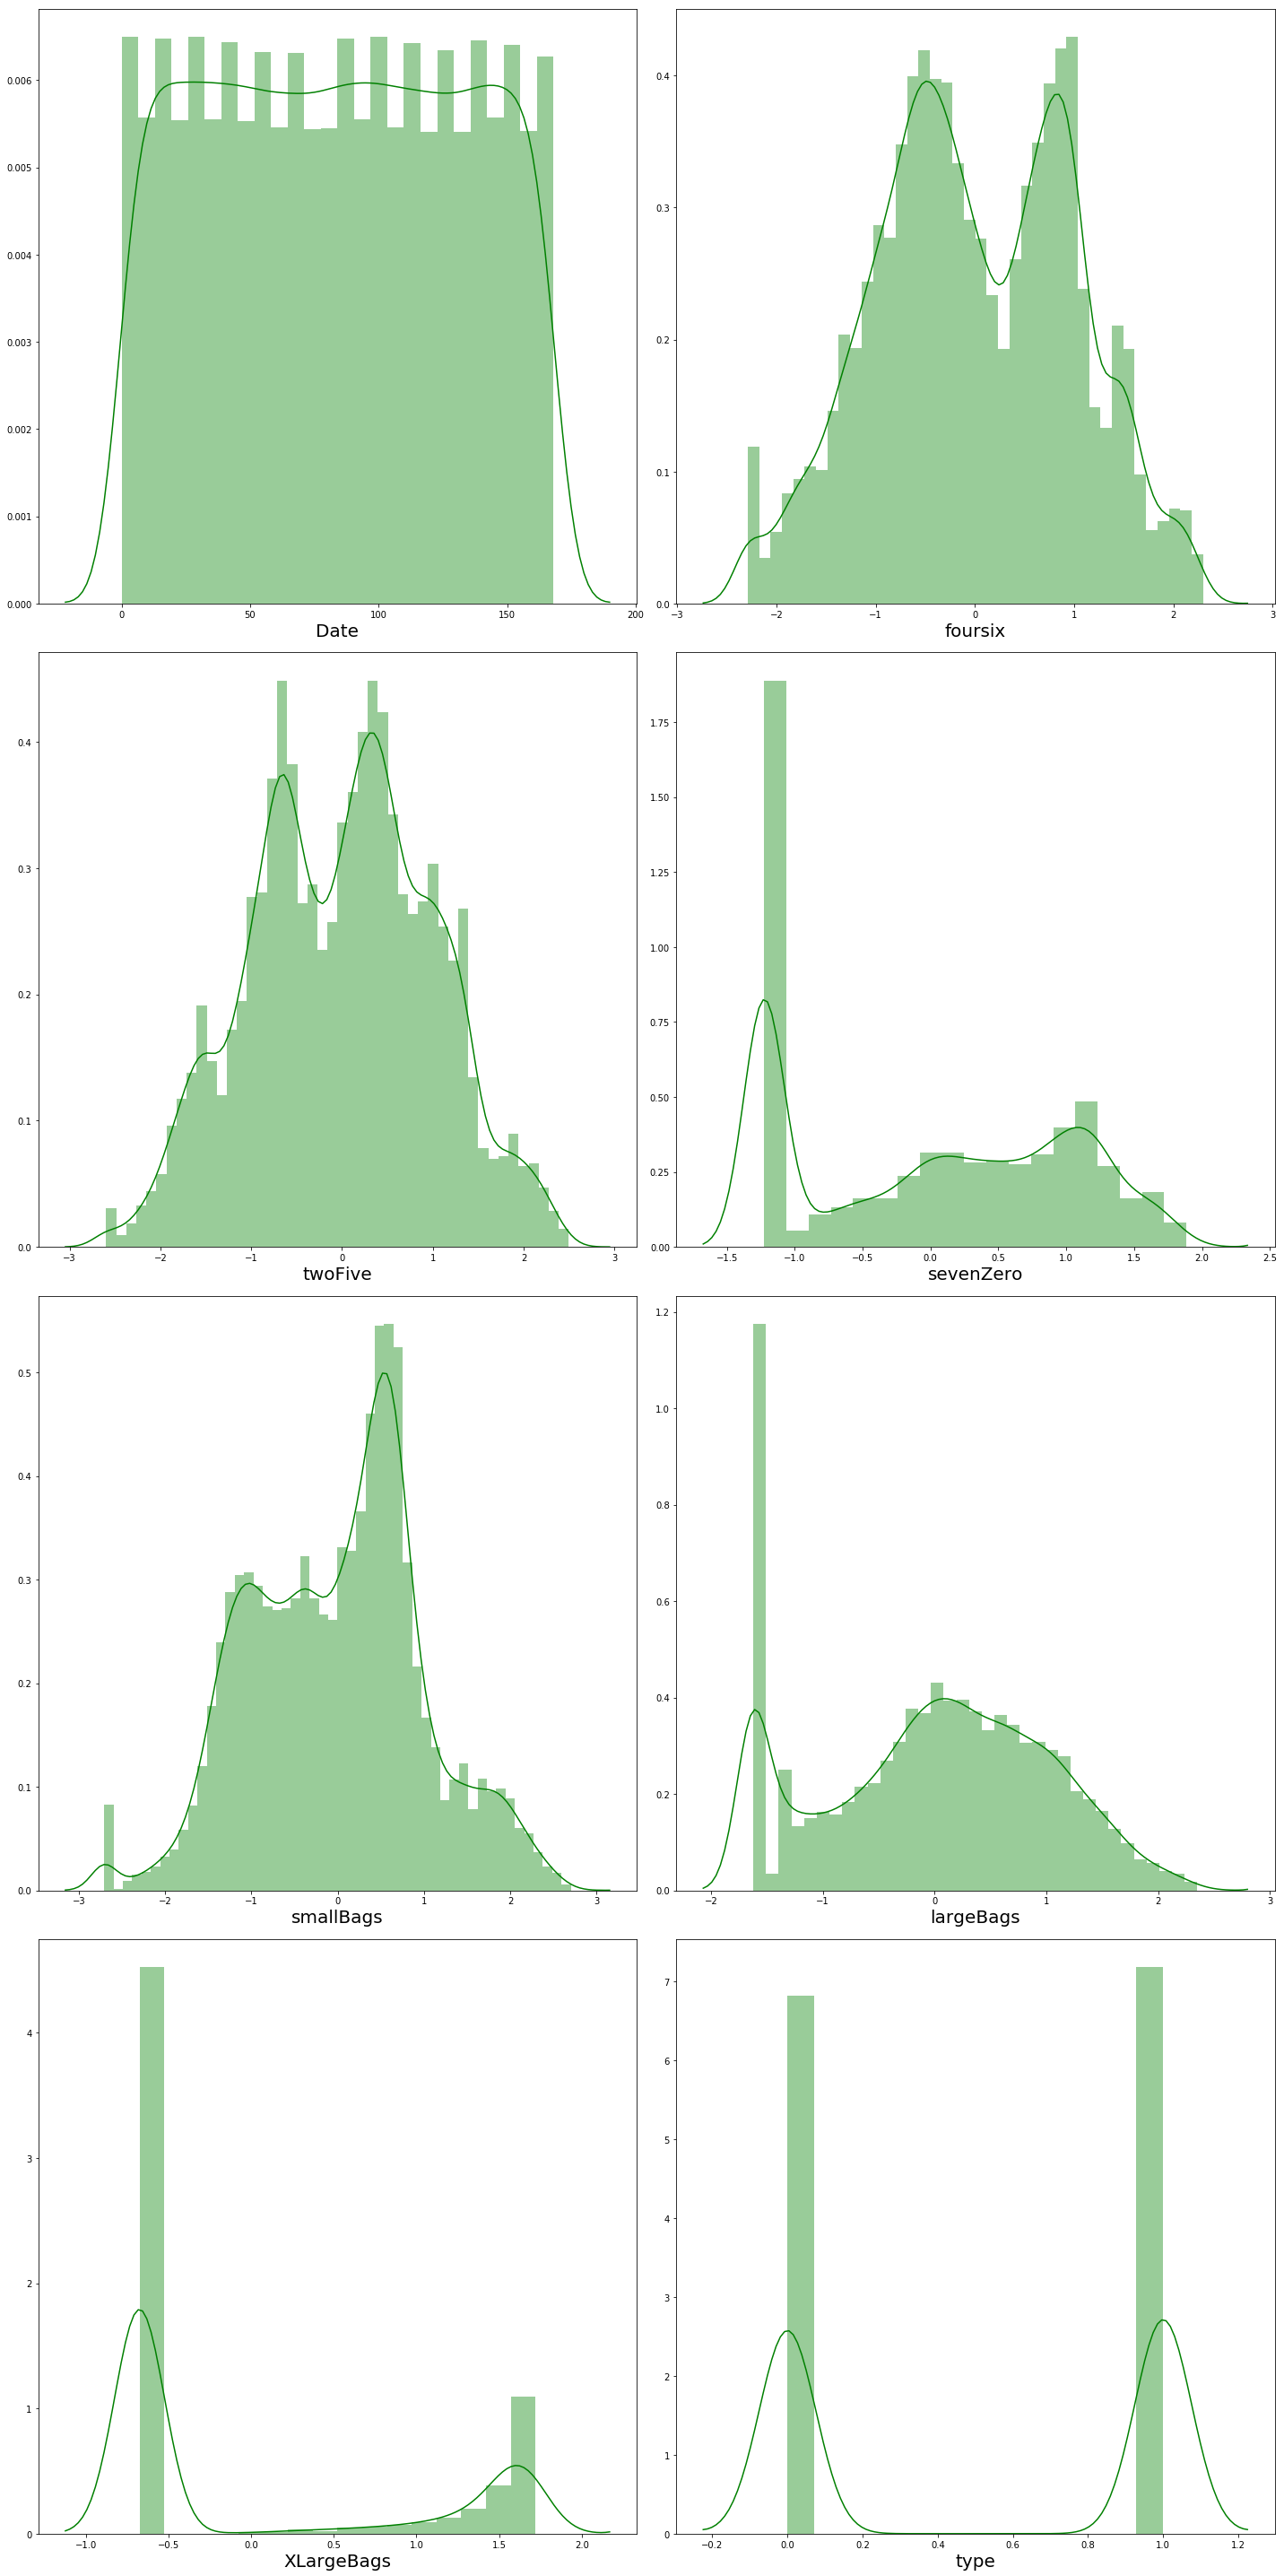

In [60]:
plt.figure(figsize=(20,40))
graph=1
for col in df_reg:
    if graph<9:
    
        plt.subplot(4,2,graph)
        sns.distplot(df_reg[col],color='green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

In [61]:
df_reg.skew()

Date            0.004284
foursix        -0.038259
twoFive        -0.043246
sevenZero       0.028015
smallBags      -0.024657
largeBags      -0.110061
XLargeBags      0.860603
type           -0.052210
year            0.220792
AveragePrice    0.560969
dtype: float64

Now, the data is morely distributed. And skewness is decreased.

Same with the df_C dataset.

In [62]:
df_reg.shape

(17782, 10)

In [63]:
print(f"Data Loss is :{((18249-17782)/18249)*100}%")

Data Loss is :2.55904433119623%


## Model Deployment for Regression Problem

In [64]:
X=df_reg.drop(columns=['AveragePrice'],axis=1)
Y=df_reg['AveragePrice']

### Normalizing the data

In [65]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[-0.67027881, -0.64991752,  0.35827836, ..., -0.67570236,
        -1.02644331, -1.21490801],
       [-0.69076442, -0.77006683,  0.27635525, ..., -0.67570236,
        -1.02644331, -1.21490801],
       [-0.71125003, -0.72450758,  0.65600965, ..., -0.67570236,
        -1.02644331, -1.21490801],
       ...,
       [ 1.54216728, -0.61035022, -0.77439502, ..., -0.67570236,
         0.97423793,  1.97914269],
       [ 1.52168167, -0.53921073, -0.7116048 , ..., -0.67570236,
         0.97423793,  1.97914269],
       [ 1.50119606, -0.35150339, -0.78720881, ..., -0.67570236,
         0.97423793,  1.97914269]])

In [66]:
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()

In [67]:
algo=[DecisionTree,RandomForest,knn,AdaBoost]

In [68]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(160,180):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 77.74578634358889 of model DecisionTreeRegressor() at random state 163

MEAN ABSOLUTE ERROR: 0.1250379533314591

MEAN SQUARED ERROR for the model: 0.037779983131852685

ROOT MEAN SQUARED ERROR for the model: 0.1943707363052697


RandomForestRegressor():
---------------------------
---------------------------

The highest accuracy is 89.53688309339134 of model RandomForestRegressor() at random state 177

MEAN ABSOLUTE ERROR: 0.09213328647736856

MEAN SQUARED ERROR for the model: 0.01787738350014057

ROOT MEAN SQUARED ERROR for the model: 0.13370633305921067


KNeighborsRegressor():
---------------------------
---------------------------

The highest accuracy is 86.0348642572094 of model KNeighborsRegressor() at random state 173

MEAN ABSOLUTE ERROR: 0.10360078718020803

MEAN SQUARED ERROR for the model: 0.022357370818105144

ROOT MEAN SQUARED ERROR for the model: 0.149523813548562

In [69]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: -1.5398815004338915 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: -0.1061860032199976 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: -0.20533472669235736 at k-fold::4

Mean CV Score of model DecisionTreeRegressor():: -0.08407483720973294 at k-fold::5

Mean CV Score of model DecisionTreeRegressor():: -0.03869932527499411 at k-fold::6

Mean CV Score of model DecisionTreeRegressor():: 0.1524763842319994 at k-fold::7

Mean CV Score of model DecisionTreeRegressor():: 0.08381107824570767 at k-fold::8

Mean CV Score of model DecisionTreeRegressor():: 0.14759859860890234 at k-fold::9


RandomForestRegressor()
-------------------------


Mean CV Score of model RandomForestRegressor():: -1.0391170257546303 at k-fold::2

Mean CV Score of model RandomForestRegressor():: 0.34000203247224753 at k-fold::3

Mean CV Score of model RandomForestRegressor():: 0.25228054280

In [70]:
CVmodel

{'DecisionTreeRegressor()': [0.1524763842319994],
 'RandomForestRegressor()': [0.506009510805925],
 'KNeighborsRegressor()': [0.17598105534603992],
 'AdaBoostRegressor()': [0.13885739458511578]}

Showing maximun cvScore for each model.

In [71]:


m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(4):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

DecisionTreeRegressor()::62.5
RandomForestRegressor()::38.94
KNeighborsRegressor()::68.44
AdaBoostRegressor()::46.25


here for model RandomForestRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 38.94 .

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=177)

here we take RandonState 177 because it is the best to use for RandomForestRegressor.

## Plotting regplot graph for LinearRegressor model

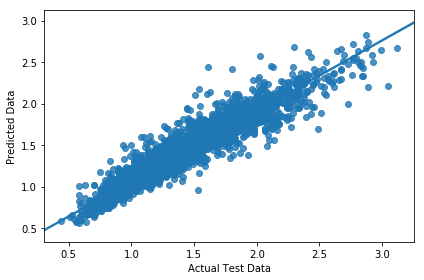

In [73]:
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line. That means the residual is less.

## Regularization

In [74]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'normalize': False}

In [75]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

51.67542469613058

Here we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model is 50.2 while the randomforest r2-score is 89.8

## Hyper parameter Tuning

In [76]:
RandomForestRegressor()

RandomForestRegressor()

In [77]:
param={
    'n_estimators':[100,101],
    'min_samples_split':[2,3],
    'max_depth':[None,20],
    'min_samples_leaf':[1,2]
}

In [78]:
grid=GridSearchCV(RandomForest,param_grid=param)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 101]})

In [79]:
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [80]:
RandomForest=RandomForestRegressor(n_estimators=100,min_samples_split=2,max_depth=None,min_samples_leaf=1)
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)

## Model Evaluation

In [81]:
print(f"The model RandomForest Regressor has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,2)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")


The model RandomForest Regressor has:: 
	 Accuracy :: 89.43% 
	 Mean Absolute Error is :: 0.09264568456564518 
	 Mean Squared Error is :: 0.018057138051728986 
	 Root Mean Squared Error is :: 0.1343768508774074


there is very slight decreased in the accuracy.earleir it was 89.5% now its 89.43%.

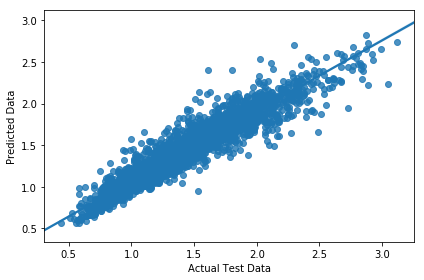

In [82]:
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line.

## Saving model.

In [83]:
import pickle
pickle.dump(RandomForest,open("avocado_AveragePrice.pickle","wb"))

## Model Deployment for Classification  Problem

In [84]:
X=df_c.drop(columns=['region'],axis=1)
Y=df_c['region']

## Normalizing the features

In [85]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[-0.64991752,  0.35827836, -0.21254977, ..., -0.67570236,
        -1.02644331, -1.21490801],
       [-0.77006683,  0.27635525, -0.16511683, ..., -0.67570236,
        -1.02644331, -1.21490801],
       [-0.72450758,  0.65600965,  0.03421507, ..., -0.67570236,
        -1.02644331, -1.21490801],
       ...,
       [-0.61035022, -0.77439502,  0.45535467, ..., -0.67570236,
         0.97423793,  1.97914269],
       [-0.53921073, -0.7116048 ,  0.45504464, ..., -0.67570236,
         0.97423793,  1.97914269],
       [-0.35150339, -0.78720881,  0.16800815, ..., -0.67570236,
         0.97423793,  1.97914269]])

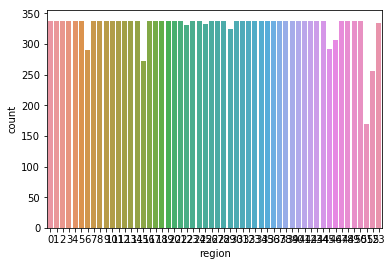

In [86]:
sns.countplot(df_c.region)

Seems to be Balanced.

In [87]:
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [88]:
algo=[DecisionTree,RandomForest,knn,AdaBoost,Bagging]

In [89]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(150,189,4):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

DecisionTreeClassifier():
---------------------------
---------------------------

The highest accuracy is 79.78633680067473 of model DecisionTreeClassifier() at random state 170


Confusion Matrix:

 [[50  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  2]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  1 ...  0  0 43]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        62
           1       0.77      0.75      0.76        73
           2       0.77      0.88      0.82        57
           3       0.79      0.79      0.79        73
           4       0.89      0.87      0.88        76
           5       0.79      0.72      0.75        82
           6       0.92      0.90      0.91        50
           7       0.79      0.73      0.76        62
           8       0.98      0.85      0.91        61
           9       0.77      0.73      0.75        60
      

AdaBoostClassifier():
---------------------------
---------------------------

The highest accuracy is 8.602755130728141 of model AdaBoostClassifier() at random state 166


Confusion Matrix:

 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ... 10  0  0]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        60
          10  

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [90]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(20,25):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.6806822461799017 at k-fold::20

Mean CV Score of model DecisionTreeClassifier():: 0.6968757297577414 at k-fold::21

Mean CV Score of model DecisionTreeClassifier():: 0.6971531593826873 at k-fold::22

Mean CV Score of model DecisionTreeClassifier():: 0.6989587053099402 at k-fold::23

Mean CV Score of model DecisionTreeClassifier():: 0.7028413028413029 at k-fold::24


RandomForestClassifier()
-------------------------


Mean CV Score of model RandomForestClassifier():: 0.8024891621693356 at k-fold::20

Mean CV Score of model RandomForestClassifier():: 0.8220552077971255 at k-fold::21

Mean CV Score of model RandomForestClassifier():: 0.8197439722340589 at k-fold::22

Mean CV Score of model RandomForestClassifier():: 0.8238573859675055 at k-fold::23

Mean CV Score of model RandomForestClassifier():: 0.8270135013556065 at k-fold::24


KNeighborsClassifier()
-------------------------




In [91]:
CVmodel

{'DecisionTreeClassifier()': [0.7028413028413029],
 'RandomForestClassifier()': [0.8270135013556065],
 'KNeighborsClassifier()': [0.7568311479495691],
 'AdaBoostClassifier()': [0.059842078150954776],
 'BaggingClassifier()': [0.7665007112375534]}

here we can see the maximun CV score of each model

In [92]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

DecisionTreeClassifier()::9.5
RandomForestClassifier()::7.91
KNeighborsClassifier()::10.15
AdaBoostClassifier()::2.62
BaggingClassifier()::9.66


here for model AdaBoostClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 2.62 .

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=166)

here we take RandomState 166 because it is the best to use for AdaBoostClassifier

In [762]:
DecisionTree.fit(X_train,Y_train)
RandomForest.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
AdaBoost.fit(X_train,Y_train)
Bagging.fit(X_train,Y_train)

BaggingClassifier()

In [96]:
Y_pred_dt=DecisionTree.predict(X_test)
Y_pred_prob_dt=DecisionTree.predict_proba(X_test)

Y_pred_rf=RandomForest.predict(X_test)
Y_pred_prob_rf=RandomForest.predict_proba(X_test)

Y_pred_knn=knn.predict(X_test)
Y_pred_prob_knn=knn.predict_proba(X_test)

Y_pred_ada=AdaBoost.predict(X_test)
Y_pred_prob_ada=AdaBoost.predict_proba(X_test)

Y_pred_br=Bagging.predict(X_test)
Y_pred_prob_br=Bagging.predict_proba(X_test)
print("All models test scored are captured!!")

All models test scored are captured!!


## DecisionTree

In [107]:
roc_auc_score(Y_test, Y_pred_prob_dt, multi_class='ovo', average='weighted')

0.9808407308020439

In [110]:
len(Y_test.unique().tolist())

54

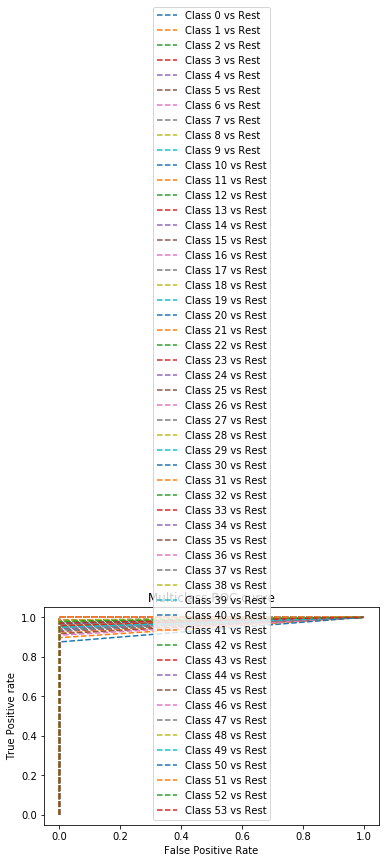

In [112]:
fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_dt[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

## RandomForest

In [113]:
roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted')

0.9998808836023693

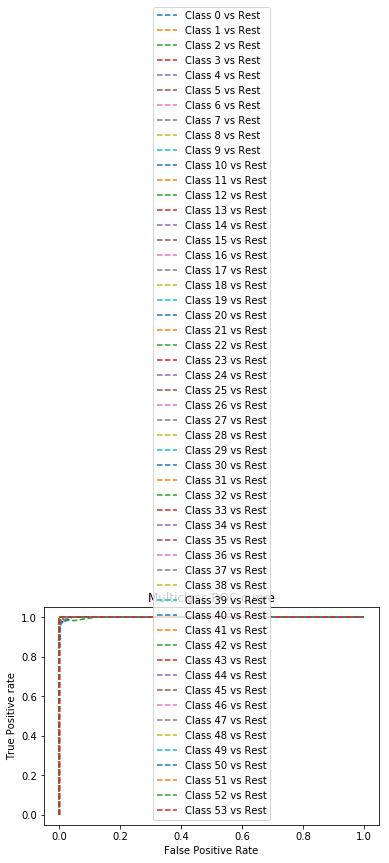

In [114]:
fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

## Knn

AUC ROC Score of Knn Model : 0.9951954416350367


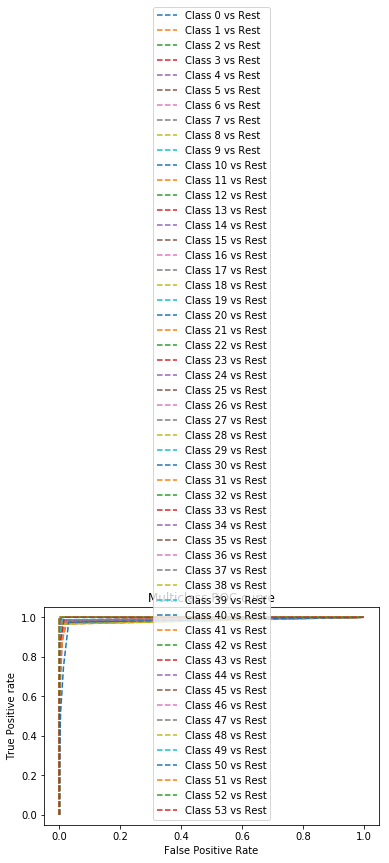

In [116]:
print("AUC ROC Score of Knn Model :",roc_auc_score(Y_test, Y_pred_prob_knn, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_knn[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

## AdaBoost

AUC ROC Score of AdaBoost Model : 0.6266888929407136


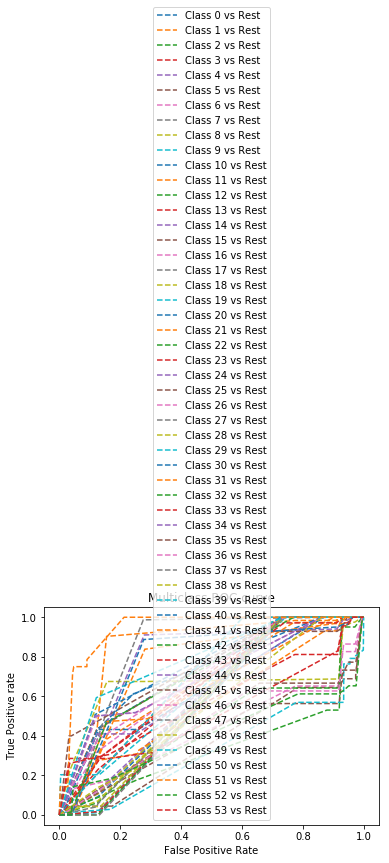

In [124]:
print("AUC ROC Score of AdaBoost Model :",roc_auc_score(Y_test, Y_pred_prob_ada, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_ada[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

#### Bagging

AUC ROC Score of Baggin Model : 0.9971607732430431


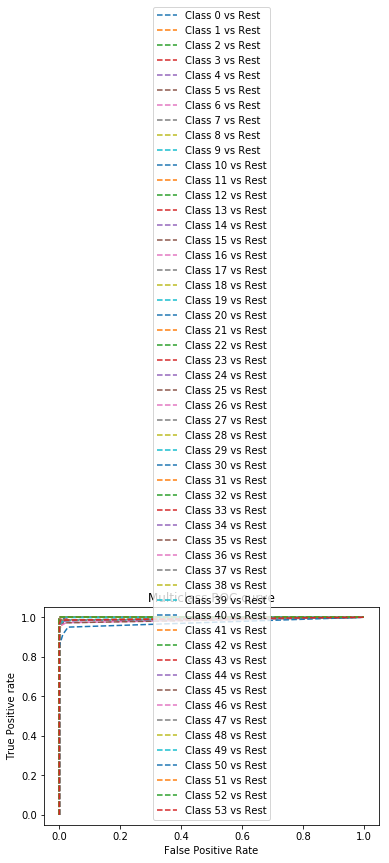

In [125]:
print("AUC ROC Score of Baggin Model :",roc_auc_score(Y_test, Y_pred_prob_br, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_br[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

Here we plot the Roc Curve for each model with their Auc_roc_score.

## Hyperparameter Tuning

In [119]:
params={"n_estimators":[43,45],'learning_rate':[0.30,0.40],"random_state":[166,174]}

In [120]:
grid=GridSearchCV(estimator=AdaBoost,cv=18,param_grid=params,n_jobs=-1)

In [121]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=18, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4], 'n_estimators': [43, 45],
                         'random_state': [166, 174]})

In [122]:
grid.best_params_

{'learning_rate': 0.3, 'n_estimators': 45, 'random_state': 166}

In [123]:
AdaBoostrf=AdaBoostClassifier(base_estimator=RandomForest,learning_rate=0.3,n_estimators=45, random_state=166)
AdaBoostrf.fit(X_train,Y_train)

Y_pred=AdaBoostrf.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.8996345234748383

Here we are using base estimator RandomForest. and gives the accuracy of 90%.

In [126]:
AdaBoostdt=AdaBoostClassifier(base_estimator=DecisionTree,learning_rate=0.3,n_estimators=45, random_state=166)
AdaBoostdt.fit(X_train,Y_train)
Y_pred=AdaBoostdt.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.7902727017149284

Here we are using base estimator DecisionTree. and gives the accuracy of  79%

#### plotting ROC Curve for both model 

### AdaBoost(RandomForest)

AUC ROC Score of AdaBoost model using RandomForest as base estimator : 0.9982404617360986


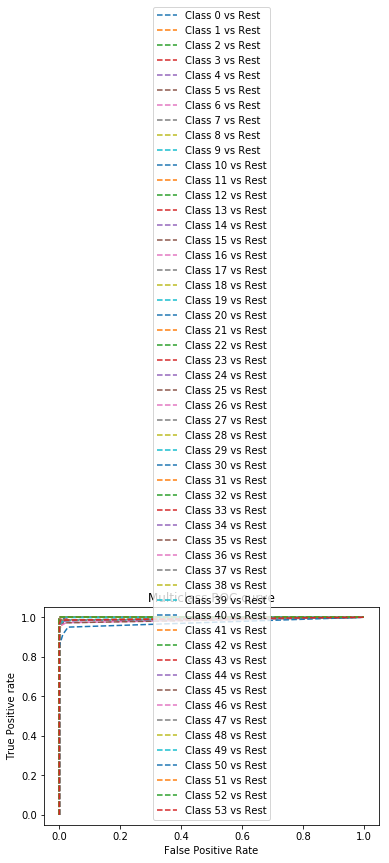

In [128]:
Y_pred_prob_rf=AdaBoostrf.predict_proba(X_test)

print("AUC ROC Score of AdaBoost model using RandomForest as base estimator :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_br[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### AdaBoost(DecisionTree)

AUC ROC Score of AdaBoost model using DecisionTree as base estimator : 0.8945841207061128


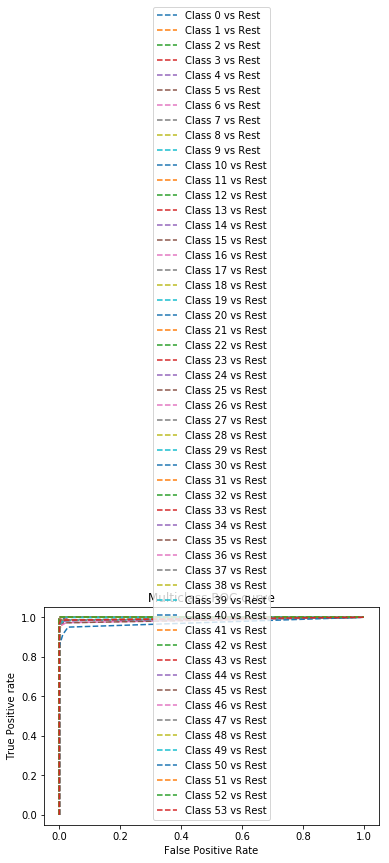

In [129]:
Y_pred_prob_rf=AdaBoostdt.predict_proba(X_test)

print("AUC ROC Score of AdaBoost model using DecisionTree as base estimator :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_br[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

from above two roc_auc Score we conclude that AdaBoost with Base Estimator RandomForest is the best to use.

## Saving Model

In [130]:
import pickle
pickle.dump(AdaBoostrf,open("avocado_region.pickle","wb"))